# *Exploring the Influence of Weather on TTC Streetcar Delays and Forecasting Delays*

- Created on: November, 2023
- Created by: Jessica Seo
---------

## 🚂Exploratory Data Analysis

### Notebook Content

- Introduction
- Data Dictionary
- Data Preparation
- Data Preprocessing / Exploratory Data Analysis (EDA)
- Summary
-------

### 🚂 Introduction 

This notebook will preprocess the Streetcar and Weather raw data merged in the `Loading Streetcar` notebook to analyze the relationship between streetcar delays and weather conditions in the city of Toronto from January 2021 to September 2023.

###  🚂 Data Dictionary 


- `Datetime`: Date and time of when weather data and streetcar delay was recorded between January, 01, 2021 to September 30, 2023.

Weather:

- `Temperature`: Atmostpheric temperature in degrees Celsius. 
- `Precipitation` : Precipitation amount stored in mm.
- `Summer_PT` : Percieved temperature in Summer to indicate hot temperature.
- `Winter_PT` : Percieved temperature in Winter to indicate cold temperature.
- `Wind_Speed` : Wind Speed km per hour.
- `Visibility` : Visibility of weather atmosphere in km.
- `Weather` : Observations of atmospheric phenomenon.


Streetcar:

- `Time`: When the delay causing incident occurred.
- `Day`: The name of the day.
- `Min Delay` : The actual delay minutes.
- `Min Gap` : The total scheduled time in minutes between the streetcar in front and the following streetcar.  
 <br>
 
- `Route` : The number of streetcar route.
- `Line` : Streetcar number. 
- `Vehicle` : Vehicle number. 
- `Location` : The loccation of the delay.
- `Incident` : The description of the dleay causing incident. 

----
### 🚂 Data Preparation

In [1]:
#importing necessary python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading merged datasest
raw_df=pd.read_csv('data/Streetcar_Weather_Data.csv')
raw_df

,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Vehicle,delaytime,datetime,Temp Definition °C,Precip. Amount Definition mm,Wind Spd Definition km/h,Visibility Definition km,Hmdx Definition,Wind Chill Definition,Weather Definition
0,501,03:15,Friday,QUEEN AND MCCAUL,Operations,19,24,4574,2021-01-01 03:15:00,2021-01-01 03:00:00,-2.0,0.0,5,16.1,NaN,-4.0,LegendNANA
1,504,03:37,Friday,BROADVIEW AND QUEEN,Operations,15,30,4500,2021-01-01 03:37:00,2021-01-01 03:00:00,-2.0,0.0,5,16.1,NaN,-4.0,LegendNANA
2,504,04:00,Friday,BROADVIEW STATION,Cleaning,15,30,4589,2021-01-01 04:00:00,2021-01-01 04:00:00,-1.4,0.0,5,16.1,NaN,-3.0,LegendNANA
3,504,04:03,Friday,DUNDAS WEST STATION,Cleaning,15,30,4582,2021-01-01 04:03:00,2021-01-01 04:00:00,-1.4,0.0,5,16.1,NaN,-3.0,LegendNANA
4,506,05:37,Friday,MAIN STATION,Mechanical,10,20,3480,2021-01-01 05:37:00,2021-01-01 05:00:00,0.4,0.0,5,16.1,NaN,NaN,LegendNANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,511,22:53,Saturday,FLEET AND MANITOBA,Diversion,44,54,4593,2023-09-30 22:53:00,2023-09-30 22:00:00,16.6,0.0,4,16.1,NaN,NaN,LegendNANA
42398,505,23:21,Saturday,KINGSTON RD LOOP,Security,10,20,4503,2023-09-30 23:21:00,2023-09-30 23:00:00,16.9,0.0,4,16.1,NaN,NaN,LegendNANA
42399,513,23:41,Saturday,1626 QUEEN ST EAST,Operations,10,10,8818,2023-09-30 23:41:00,2023-09-30 23:00:00,16.9,0.0,4,16.1,NaN,NaN,LegendNANA
42400,501,00:48,Saturday,QUEEN AND AUGUSTA,Diversion,41,61,0,2023-09-30 00:48:00,2023-09-30 00:00:00,16.9,0.0,11,16.1,NaN,NaN,LegendNANA


In [4]:
#changing column orders to make it sense to me
change_column=['datetime','Temp Definition °C', 'Precip. Amount Definition mm','Hmdx Definition', 'Wind Chill Definition','Wind Spd Definition km/h','Visibility Definition km','Weather Definition','delaytime','Day','Line','Location','Incident','Min Delay','Min Gap']
raw_df=raw_df.reindex(columns=change_column)
raw_df.head(3)

,datetime,Temp Definition °C,Precip. Amount Definition mm,Hmdx Definition,Wind Chill Definition,Wind Spd Definition km/h,Visibility Definition km,Weather Definition,delaytime,Day,Line,Location,Incident,Min Delay,Min Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:15:00,Friday,501,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:37:00,Friday,504,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:00:00,Friday,504,BROADVIEW STATION,Cleaning,15,30


In [5]:
#renaming columns for readability.
raw_df.columns=['Datetime','Temperature','Precipitation','Summer_PT','Winter_PT','Wind_Speed','Visibility','Weather','Delaytime','Day','Line','Location','Incident','Min_Delay','Min_Gap']
raw_df

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:15:00,Friday,501,QUEEN AND MCCAUL,Operations,19,24
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,LegendNANA,2021-01-01 03:37:00,Friday,504,BROADVIEW AND QUEEN,Operations,15,30
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:00:00,Friday,504,BROADVIEW STATION,Cleaning,15,30
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,LegendNANA,2021-01-01 04:03:00,Friday,504,DUNDAS WEST STATION,Cleaning,15,30
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,5,16.1,LegendNANA,2021-01-01 05:37:00,Friday,506,MAIN STATION,Mechanical,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,2023-09-30 22:00:00,16.6,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 22:53:00,Saturday,511,FLEET AND MANITOBA,Diversion,44,54
42398,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 23:21:00,Saturday,505,KINGSTON RD LOOP,Security,10,20
42399,2023-09-30 23:00:00,16.9,0.0,NaN,NaN,4,16.1,LegendNANA,2023-09-30 23:41:00,Saturday,513,1626 QUEEN ST EAST,Operations,10,10
42400,2023-09-30 00:00:00,16.9,0.0,NaN,NaN,11,16.1,LegendNANA,2023-09-30 00:48:00,Saturday,501,QUEEN AND AUGUSTA,Diversion,41,61


In [6]:
#checking datatypes, shape
print(f'This dataframe have {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.')
print('\n')
raw_df.info()

This dataframe have 42402 rows and 15 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42402 entries, 0 to 42401
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Datetime       42402 non-null  object 
 1   Temperature    42337 non-null  object 
 2   Precipitation  42337 non-null  float64
 3   Summer_PT      7242 non-null   float64
 4   Winter_PT      7184 non-null   float64
 5   Wind_Speed     42337 non-null  object 
 6   Visibility     42337 non-null  object 
 7   Weather        42337 non-null  object 
 8   Delaytime      42402 non-null  object 
 9   Day            42402 non-null  object 
 10  Line           42186 non-null  object 
 11  Location       42402 non-null  object 
 12  Incident       42401 non-null  object 
 13  Min_Delay      42402 non-null  int64  
 14  Min_Gap        42402 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 4.9+ MB


We can work to convert `Datetime`, `Temperature`, `Wind_Speed`, `Delaytime`, `Line` and `Visibility` column datatypes. We see that few columns have null values.

In [7]:
#converting datetime
raw_df['Datetime'] =pd.to_datetime(raw_df['Datetime']) 
raw_df['Delaytime'] =pd.to_datetime(raw_df['Delaytime']) 

In [8]:
#sanity check
raw_df.dtypes

Datetime         datetime64[ns]
Temperature              object
Precipitation           float64
Summer_PT               float64
Winter_PT               float64
Wind_Speed               object
Visibility               object
Weather                  object
Delaytime        datetime64[ns]
Day                      object
Line                     object
Location                 object
Incident                 object
Min_Delay                 int64
Min_Gap                   int64
dtype: object

In [9]:
#checking duplicates before preprocessing
raw_df.duplicated().sum()

192

In [10]:
#Checking the proportion of duplicated rows in overall data 
raw_df.duplicated().sum()/raw_df.shape[0]*100

0.4528088297721806

In [11]:
#looking at duplicated values
raw_df.loc[raw_df.duplicated(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
24,2021-01-01 12:00:00,2.2,0.0,NaN,NaN,17,16.1,LegendNANA,2021-01-01 12:58:00,Friday,511,EXHIBITION LOOP,Cleaning,0,0
40,2021-01-01 17:00:00,2.3,0.0,NaN,NaN,21,16.1,LegendNANA,2021-01-01 17:49:00,Friday,506,MAIN STREET STATION,Operations,7,14
42,2021-01-01 20:00:00,0.6,2.0,NaN,NaN,32,3.2,Snow,2021-01-01 20:35:00,Friday,504,BROADVIEW STATION,Operations,10,20
88,2021-01-02 15:00:00,1.7,0.0,NaN,NaN,11,16.1,LegendNANA,2021-01-02 15:36:00,Saturday,510,SPADINA AND QUEEN'S QU,Cleaning,7,14
93,2021-01-02 19:00:00,1.5,0.0,NaN,NaN,8,16.1,LegendNANA,2021-01-02 19:14:00,Saturday,510,UNION STATION,Cleaning,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40705,2023-08-13 15:00:00,23.4,0.0,27.0,NaN,17,16.1,LegendNANA,2023-08-13 15:38:00,Sunday,509,UNION STATION,General Delay,6,13
40949,2023-08-19 17:00:00,18.6,0.0,NaN,NaN,11,16.1,LegendNANA,2023-08-19 17:13:00,Saturday,505,QUEEN AND WOODFIELD,Operations,10,20
41049,2023-08-22 08:00:00,20.0,0.0,NaN,NaN,13,16.1,LegendNANA,2023-08-22 08:23:00,Tuesday,503,BINGHAM LOOP,Mechanical,10,20
41327,2023-08-29 16:00:00,23.1,0.0,27.0,NaN,9,16.1,LegendNANA,2023-08-29 16:10:00,Tuesday,501,GERRARD AND MUNRO,Mechanical,7,14


In [12]:
#checking duplicates
raw_df[(raw_df.Delaytime=='2021-01-01 12:58:00')&(raw_df.Line =='511')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
23,2021-01-01 12:00:00,2.2,0.0,NaN,NaN,17,16.1,LegendNANA,2021-01-01 12:58:00,Friday,511,EXHIBITION LOOP,Cleaning,0,0
24,2021-01-01 12:00:00,2.2,0.0,NaN,NaN,17,16.1,LegendNANA,2021-01-01 12:58:00,Friday,511,EXHIBITION LOOP,Cleaning,0,0


In [13]:
#drop duplicated to only keep unique values
df = raw_df.drop_duplicates()

In [14]:
print(f'After dropping duplicates, we have {df.shape[0]} rows and {df.shape[1]} columns.')

After dropping duplicates, we have 42210 rows and 15 columns.


In [15]:
#checking null values.
df.isna().sum()

Datetime             0
Temperature         64
Precipitation       64
Summer_PT        34990
Winter_PT        35054
Wind_Speed          64
Visibility          64
Weather             64
Delaytime            0
Day                  0
Line               216
Location             0
Incident             1
Min_Delay            0
Min_Gap              0
dtype: int64

In [16]:
#Checking the proportion of missing values out of whole dataframe
df.isna().sum()/df.shape[0]*100

Datetime          0.000000
Temperature       0.151623
Precipitation     0.151623
Summer_PT        82.895049
Winter_PT        83.046671
Wind_Speed        0.151623
Visibility        0.151623
Weather           0.151623
Delaytime         0.000000
Day               0.000000
Line              0.511727
Location          0.000000
Incident          0.002369
Min_Delay         0.000000
Min_Gap           0.000000
dtype: float64

There are null values in columns such as `Temperature`, `Precipitation`, `Visibility`,`Wind Speed` and `Weather`, but the proportion of missing value rows is very low compared to the overall dataset. While we could choose to drop them right away, let's investigate each column to make a more informed decision. When we inspected the overall dataframe using the `.head()` method, we noticed values like `LegendNANA`, which could indicate hidden null values.   

Additionally, the columns `Summer_PT` and `Weather_PT` have the highest number of null values, accounting for over 83% of the entire dataset. However, these columns only indicate days when the city of Toronto experienced heat warnings or freezing cold weather, so we will keep them as they are.

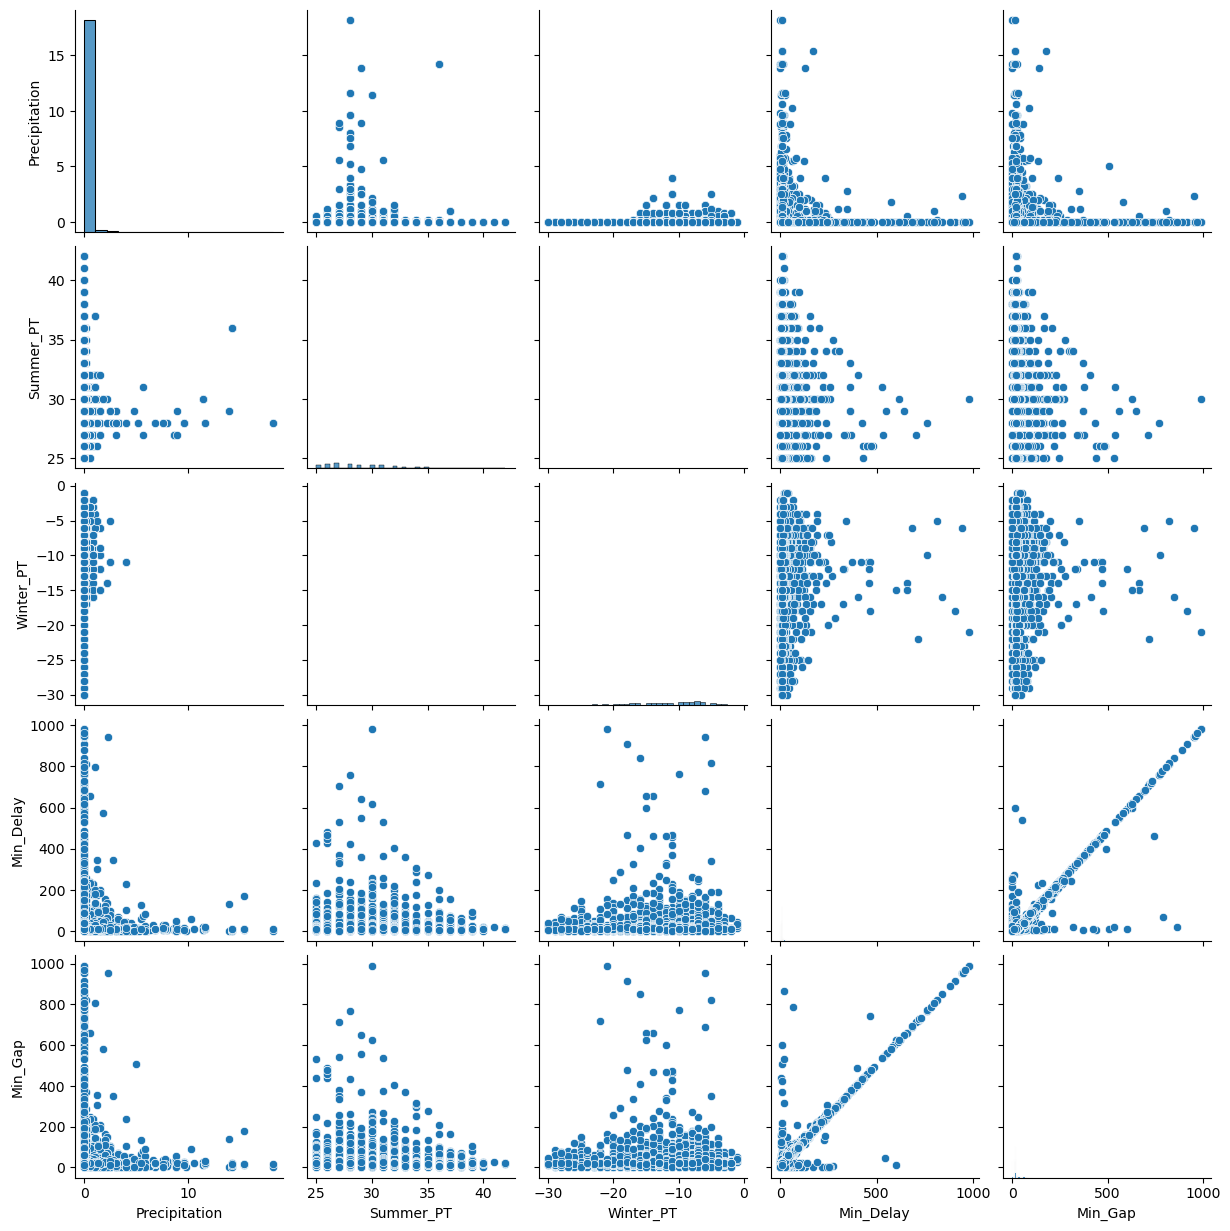

In [17]:
#looking into correlation scatter between all numerical columns
sns.pairplot(df)

Observation:
- `Min_Delay` and `Min_Gap` has a very strong positive correlation linear graph.
- There are severa outliers in between overall variables. 
- `Min_Delay` and `Min_Gap` probably has the most values between 0 and 250.
- It's hard to see the relationship between weather data and streetcar delay right now.

----
### 🚂 Data Preprocessing/ EDA

In [18]:
#Let's check out the null value rows
nulls = df[['Temperature', 'Precipitation', 'Wind_Speed','Visibility', 'Weather']].isna().any(axis=1)
df[nulls].sort_values(by='Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,506,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:41:00,Thursday,505,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:46:00,Thursday,506,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 16:10:00,Thursday,504,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-19 11:02:00,Monday,501,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:18:00,Thursday,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,501,ROYAL YORK AND LAKESHO,General Delay,25,31


Let's take into account that weather data is recorded hourly, while streetcar data is recorded by the occurrence time. This means that duplicated weather rows had to be created in the process of merging with streetcar data. Consequently, multiple null values may exist in the weather data, making it challenging to make reliable decisions. For example, we can't check the correlation between variables when all columns have null values in the same row. However, weather data is an essential part of our analysis, so we will investigate each column to identify patterns and assess distributions in order to handle missing values.

----
### Imputing Temperature values

In [19]:
#checking datatype
df['Temperature'].dtype

dtype('O')

In [20]:
#Temperature value counts
df['Temperature'].value_counts()

LegendMM    406
2.0         213
1.1         202
2.5         194
19.6        185
           ... 
-3.0          1
-18.0         1
-8.1          1
-9.1          1
29.2          1
Name: Temperature, Length: 897, dtype: int64

In [21]:
df['Temperature'].unique()

array(['-2.0', '-1.4', '0.4', '0.0', '0.5', '1.4', '1.5', '1.7', '2.2',
       '2.1', '2.3', '0.6', '1.2', '-1.2', '0.1', '-0.5', '1.3', '1.6',
       '1.8', '1.9', '0.8', '1.0', '0.7', '1.1', '0.9', '2.0', '-0.8',
       '-1.1', '-1.7', '0.3', '-0.6', '-1.0', '-2.1', '-2.4', '-3.0',
       '-4.7', '-7.2', '-7.4', '-7.1', '-7.3', '-5.9', '-4.5', '-4.4',
       '-4.0', '-3.6', '-4.9', '-3.4', '-4.1', '-1.5', '-1.9', '-1.8',
       '-1.3', '4.1', '3.9', '0.2', '-0.9', '-0.3', '-0.7', '-2.9',
       '-2.5', '-1.6', '-0.4', '-0.1', '3.5', '3.1', '2.9', '2.6', '3.4',
       '4.7', '3.8', '4.4', '4.5', '4.3', '3.3', '4.0', '2.5', '2.8',
       '-3.3', '-0.2', '-2.8', '-5.4', '-6.3', '-6.2', '-5.2', '-4.8',
       '-3.8', '-3.7', '-3.9', '-2.3', '3.2', '-4.2', '-5.1', '-5.7',
       '-9.9', '-10.3', '-9.7', '-7.9', '-4.6', '-5.6', '-5.8', '-5.5',
       '-2.7', '-2.6', '-2.2', '-5.0', '-3.5', '-3.2', '-6.4', '-6.1',
       '-6.9', '-11.7', '-11.8', '-10.5', '-9.6', '-8.4', '-8.0', '-6.8',
   

There are more null values than we initially checked. The label `LegendMM` is used to indicate missing values, as specified by *Environment Canada*.

In [22]:
#Replacing LegendMM values to null to work on it all together.
#Storing the new information
df['Temperature'].replace(['LegendMM'], [None], inplace=True)

In [23]:
#Sanity check
df['Temperature'].value_counts(dropna=False)

None     406
2.0      213
1.1      202
2.5      194
19.6     185
        ... 
-3.0       1
-18.0      1
-8.1       1
-9.1       1
29.2       1
Name: Temperature, Length: 898, dtype: int64

In [24]:
#Now convert Temperature datatype now that all the values are numerical. 
df['Temperature']=df['Temperature'].astype('float')

In [25]:
#Sanity check
df.Temperature.dtypes

dtype('float64')

In [26]:
#Looking at null value rows
df.loc[df.Temperature.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
1257,2021-02-08 23:00:00,NaN,0.0,NaN,NaN,11,3.2,Snow,2021-02-08 23:46:00,Monday,504,QUEEN AND BROADVIEW,Mechanical,10,20
1260,2021-02-09 02:00:00,NaN,0.0,NaN,NaN,8,11.3,Snow,2021-02-09 02:51:00,Tuesday,504,KING AND BAY,Security,8,16
1262,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:04:00,Tuesday,511,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:53:00,Tuesday,512,ST CLAIR TO GUNN LOOP,General Delay,0,0
3435,2021-04-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,506,COXWELL AND LOWER GERR,Cleaning,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:18:00,Thursday,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,501,ROYAL YORK AND LAKESHO,General Delay,25,31


In [27]:
#Looking at them by date 
df[df.Datetime.dt.date==pd.Timestamp(2021, 2, 9)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
1260,2021-02-09 02:00:00,NaN,0.0,NaN,NaN,8,11.3,Snow,2021-02-09 02:51:00,Tuesday,504,KING AND BAY,Security,8,16
1261,2021-02-09 03:00:00,-8.2,0.0,NaN,NaN,LegendMM,4.0,Snow,2021-02-09 03:17:00,Tuesday,301,LONG BRANCH LOOP,Emergency Services,0,0
1262,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:04:00,Tuesday,511,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,NaN,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:53:00,Tuesday,512,ST CLAIR TO GUNN LOOP,General Delay,0,0
1264,2021-02-09 08:00:00,-8.1,0.0,NaN,-14.0,13,LegendMM,LegendNANA,2021-02-09 08:31:00,Tuesday,501,HUMBER LOOP,Mechanical,6,12
1265,2021-02-09 12:00:00,-3.6,0.0,NaN,-8.0,11,16.1,LegendNANA,2021-02-09 12:58:00,Tuesday,504,DUNDAS WEST STATION,Operations,4,8
1266,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:16:00,Tuesday,506,COLLEGE AND SPADINA,Held By,8,15
1267,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:54:00,Tuesday,505,PARLIAMENT AND DUNDAS,Operations,7,14
1268,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:04:00,Tuesday,501,QUEEN AND RONCESVALLES,Operations,7,14
1269,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:50:00,Tuesday,504,KING AND DUFFERIN,Held By,19,26


In [28]:
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
39136,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:23:00,Thursday,512,VAUGHAN AND ST CLAIR,Rail/Switches,0,0
39137,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:34:00,Thursday,501,QUEEN AND DUFFERIN,Mechanical,9,13
39138,2023-06-29 06:00:00,15.2,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 06:53:00,Thursday,501,QUEEN AND JARVIS,Security,6,12
39139,2023-06-29 08:00:00,18.8,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 08:19:00,Thursday,506,COLLEGE AND GRACE,General Delay,10,20
39140,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:03:00,Thursday,510,QUEENS QUAY AND REES,General Delay,10,20
39141,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:12:00,Thursday,501,QUEEN AND GREENWOOD,Held By,35,44
39142,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:13:00,Thursday,506,QUEEN AND HILTZ,Collision - TTC Involved,30,40
39143,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:16:00,Thursday,505,DUNDAS AND RONCESVALLE,Operations,46,56
39144,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:21:00,Thursday,501,QUEEN AND HILTZ,Diversion,7,14
39145,2023-06-29 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:22:00,Thursday,505,QUEEN AND GREENWOOD,Held By,31,41


Thankfully, it appears that there isn't an entire day without the temperature value. When looking into a one-day timestamp dataframe, it becomes clear that we could use `ffill` method to impute the missing values since temperature does not significantly change between hours. For example, on June 29, 2023, there are 16 null values but in reality, there are only 2 missing values that occurred between 10-11 am.

In [29]:
#Imputating
df['Temperature']=df['Temperature'].ffill(axis=0)

In [30]:
#Checking if the null values are filled.
print(f'Temperature missing value is now at {df.Temperature.isna().sum()}.')

Temperature missing value is now at 0.


----
### Imputing Precipitation values

In [31]:
#checking datatype
df.Precipitation.dtypes

dtype('float64')

In [32]:
#looking at unique values
df.Precipitation.value_counts(dropna=False)

0.0     39278
0.2       956
0.5       490
0.8       337
1.0       208
1.5       177
1.2       119
1.8        76
2.0        73
2.5        70
NaN        64
2.2        57
3.2        40
4.0        33
3.0        33
2.8        19
3.8        14
4.5        13
3.5        11
4.3         9
3.3         9
5.5         8
4.8         7
5.3         7
5.0         7
6.8         7
5.8         6
8.8         6
14.2        5
9.6         5
1.3         5
7.8         5
2.3         5
11.6        4
7.6         4
11.4        4
15.4        4
5.2         4
6.0         4
8.6         3
4.2         3
0.1         3
13.9        2
9.0         2
5.6         2
8.9         2
8.0         2
18.2        2
10.6        1
6.3         1
10.3        1
1.4         1
9.8         1
6.6         1
Name: Precipitation, dtype: int64

In [33]:
df.Precipitation.isna().sum()

64

No hidden null values identified as the null value is same as what we alrady checked: 64 rows.

In [34]:
#checking null value rows
df.loc[df.Precipitation.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,506,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:41:00,Thursday,505,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:46:00,Thursday,506,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 16:10:00,Thursday,504,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,26.3,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-19 11:02:00,Monday,501,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:18:00,Thursday,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,18.5,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,501,ROYAL YORK AND LAKESHO,General Delay,25,31


In [35]:
#I see multiple rows of 2021-4-8
#checking the rest of precipiation value on that date
df[df.Datetime.dt.date==pd.Timestamp(2021, 4, 8)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
3397,2021-04-08 02:00:00,10.3,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 02:09:00,Thursday,306,DUNDAS WEST STATION,Emergency Services,9,18
3398,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,505,RONCESVALLES YARD,Operations,10,20
3399,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,506,RONCESVALLES YARD,Operations,4,12
3400,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,506,RONCESVALLES YARD,Operations,8,16
3401,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:52:00,Thursday,512,HOWARD PARK AND DUNDAS,Operations,0,38
3402,2021-04-08 05:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 05:00:00,Thursday,501,DUNDAS WEST STATION,Held By,0,20
3403,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:35:00,Thursday,501,QUEENSWAY AND RONCESVA,Operations,7,13
3404,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:37:00,Thursday,501,QUEEN AND YONGE,Cleaning,7,14
3406,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:52:00,Thursday,506,COXWELL AND LOWER GERR,General Delay,10,15
3407,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:56:00,Thursday,501,QUEENSWAY AND RONCESVA,Operations,8,16


In [36]:
#one more check
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
39136,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:23:00,Thursday,512,VAUGHAN AND ST CLAIR,Rail/Switches,0,0
39137,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:34:00,Thursday,501,QUEEN AND DUFFERIN,Mechanical,9,13
39138,2023-06-29 06:00:00,15.2,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 06:53:00,Thursday,501,QUEEN AND JARVIS,Security,6,12
39139,2023-06-29 08:00:00,18.8,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 08:19:00,Thursday,506,COLLEGE AND GRACE,General Delay,10,20
39140,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:03:00,Thursday,510,QUEENS QUAY AND REES,General Delay,10,20
39141,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:12:00,Thursday,501,QUEEN AND GREENWOOD,Held By,35,44
39142,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:13:00,Thursday,506,QUEEN AND HILTZ,Collision - TTC Involved,30,40
39143,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:16:00,Thursday,505,DUNDAS AND RONCESVALLE,Operations,46,56
39144,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:21:00,Thursday,501,QUEEN AND HILTZ,Diversion,7,14
39145,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:22:00,Thursday,505,QUEEN AND GREENWOOD,Held By,31,41


Coincidentally, we see a relationship between `Precipiation` and `Visibility` variables. When precipiation is at 0mm, visibility is at 16.1km. Let's dig deeper in this.

### Imputing Visibility values

In [37]:
#checking datatype 
df['Visibility'].dtypes

dtype('O')

In [38]:
#looking at unique values
df.Visibility.unique()

array(['16.1', '3.2', '6.4', '8.1', '9.7', '2.4', '2.8', '14.5', '11.3',
       '12.9', '4.8', '4.0', '0.6', '0.8', '1.0', '0.4', 'LegendMM',
       '3.6', '2.0', '1.6', nan, '1.2', '0.2', '0.0'], dtype=object)

In [39]:
#Toal number of missing values
df.Visibility.isna().sum()

64

There is more than 64 missing values here under the label `LegendMM`.

In [40]:
#Getting rid of string value(LegendMM)
#Replacing inplace
df['Visibility'].replace(['LegendMM'], [None], inplace=True)

In [41]:
#looking at null value counts
df['Visibility'].value_counts(dropna=False)

16.1    37692
9.7       525
12.9      513
14.5      435
4.8       418
6.4       417
8.1       415
11.3      400
4.0       194
2.8       162
3.2       150
2.4       113
2.0       112
1.6        92
1.2        90
0.6        85
0.4        79
3.6        76
NaN        64
0.2        61
0.8        55
1.0        33
None       21
0.0         8
Name: Visibility, dtype: int64

In [42]:
#checking null value rows
df.loc[df.Visibility.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
1264,2021-02-09 08:00:00,-8.1,0.0,NaN,-14.0,13,None,LegendNANA,2021-02-09 08:31:00,Tuesday,501,HUMBER LOOP,Mechanical,6,12
3435,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:39:00,Thursday,506,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:41:00,Thursday,505,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 14:46:00,Thursday,506,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,13.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-08 16:10:00,Thursday,504,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39154,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:44:00,Thursday,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 11:48:00,Thursday,506,DUNDAS AND PARLIAMENT,Held By,10,20
39156,2023-06-29 13:00:00,22.5,0.0,NaN,NaN,13.0,None,LegendNANA,2023-06-29 13:26:00,Thursday,501,CHURCH AND KING,Operations,6,12
41128,2023-08-24 17:00:00,18.5,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-24 17:05:00,Thursday,501,ROYAL YORK AND LAKESHO,General Delay,25,31


In [43]:
#let's see what the weather was like in 2021-02-09
df[df.Datetime.dt.date==pd.Timestamp(2021, 2, 9)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
1260,2021-02-09 02:00:00,-11.0,0.0,NaN,NaN,8,11.3,Snow,2021-02-09 02:51:00,Tuesday,504,KING AND BAY,Security,8,16
1261,2021-02-09 03:00:00,-8.2,0.0,NaN,NaN,LegendMM,4.0,Snow,2021-02-09 03:17:00,Tuesday,301,LONG BRANCH LOOP,Emergency Services,0,0
1262,2021-02-09 05:00:00,-8.2,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:04:00,Tuesday,511,BATHURST AND COLLEGE,Held By,0,0
1263,2021-02-09 05:00:00,-8.2,0.0,NaN,NaN,8,16.1,Snow,2021-02-09 05:53:00,Tuesday,512,ST CLAIR TO GUNN LOOP,General Delay,0,0
1264,2021-02-09 08:00:00,-8.1,0.0,NaN,-14.0,13,None,LegendNANA,2021-02-09 08:31:00,Tuesday,501,HUMBER LOOP,Mechanical,6,12
1265,2021-02-09 12:00:00,-3.6,0.0,NaN,-8.0,11,16.1,LegendNANA,2021-02-09 12:58:00,Tuesday,504,DUNDAS WEST STATION,Operations,4,8
1266,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:16:00,Tuesday,506,COLLEGE AND SPADINA,Held By,8,15
1267,2021-02-09 13:00:00,-2.7,0.0,NaN,-7.0,13,16.1,LegendNANA,2021-02-09 13:54:00,Tuesday,505,PARLIAMENT AND DUNDAS,Operations,7,14
1268,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:04:00,Tuesday,501,QUEEN AND RONCESVALLES,Operations,7,14
1269,2021-02-09 14:00:00,-2.9,0.0,NaN,-7.0,11,16.1,LegendNANA,2021-02-09 14:50:00,Tuesday,504,KING AND DUFFERIN,Held By,19,26


In [44]:
#one more
df[df.Datetime.dt.date==pd.Timestamp(2023, 6, 29)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
39136,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:23:00,Thursday,512,VAUGHAN AND ST CLAIR,Rail/Switches,0,0
39137,2023-06-29 05:00:00,13.5,0.0,NaN,NaN,8.0,16.1,LegendNANA,2023-06-29 05:34:00,Thursday,501,QUEEN AND DUFFERIN,Mechanical,9,13
39138,2023-06-29 06:00:00,15.2,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 06:53:00,Thursday,501,QUEEN AND JARVIS,Security,6,12
39139,2023-06-29 08:00:00,18.8,0.0,NaN,NaN,5.0,16.1,LegendNANA,2023-06-29 08:19:00,Thursday,506,COLLEGE AND GRACE,General Delay,10,20
39140,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:03:00,Thursday,510,QUEENS QUAY AND REES,General Delay,10,20
39141,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:12:00,Thursday,501,QUEEN AND GREENWOOD,Held By,35,44
39142,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:13:00,Thursday,506,QUEEN AND HILTZ,Collision - TTC Involved,30,40
39143,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:16:00,Thursday,505,DUNDAS AND RONCESVALLE,Operations,46,56
39144,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:21:00,Thursday,501,QUEEN AND HILTZ,Diversion,7,14
39145,2023-06-29 10:00:00,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-29 10:22:00,Thursday,505,QUEEN AND GREENWOOD,Held By,31,41


On June 29, 2023, there is a significant number of missing values in the `Visibility` column, but they are only present between 10 am and 1 pm. Similar to the approach we took for `Temperature`, we can assume that visibility will not significantly change within this time frame, so we will impute the missing values using the `ffill` method. These rows represent only 0.15% of the entire dataset, so the impact on the overall dataset will be minimal.

In [45]:
#Imputing
df['Visibility']=df['Visibility'].ffill(axis=0)

In [46]:
#checking
print(f'Visibility missing value is now at {df.Visibility.isna().sum()}.')

Visibility missing value is now at 0.


In [47]:
#Now, let's conver datatype
df['Visibility']=df['Visibility'].astype('float')

In [48]:
#checking
df.Visibility.dtype

dtype('float64')

### Back to Precipitation imputation

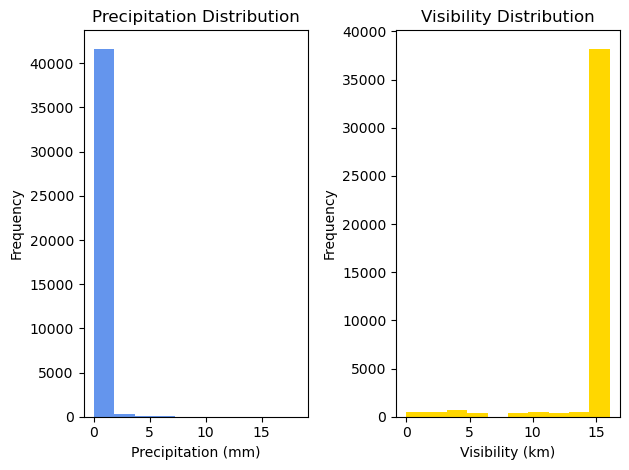

In [49]:
#Checking the distribution between Precipitation and Visibility
plt.figure()

plt.subplot(1, 2, 1)
plt.hist(df['Precipitation'], color='cornflowerblue')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Precipitation Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['Visibility'], color='gold')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Distribution')

plt.tight_layout()
plt.show()

As mentioned before, the histogram provides a reliable reason for imputing `Precipitation` values based on `Visibility`. The rationale behind setting precipitation to 0.0 mm when visibility is at 16.1 km will be explained later. Therefore, for now, we will first fill in precipitation as 0.0 mm when visibility is at 16.1 km, and then we will use `ffill` method to impute the remaining missing rows.

In [50]:
#Imputating and checking
condition1 = df['Visibility'] == 16.1
df.loc[condition1, 'Precipitation'] = df.loc[condition1, 'Precipitation'].fillna(0.0)

In [51]:
df.Precipitation.value_counts(dropna=False)

0.0     39332
0.2       956
0.5       490
0.8       337
1.0       208
1.5       177
1.2       119
1.8        76
2.0        73
2.5        70
2.2        57
3.2        40
4.0        33
3.0        33
2.8        19
3.8        14
4.5        13
3.5        11
NaN        10
4.3         9
3.3         9
5.5         8
5.0         7
5.3         7
6.8         7
4.8         7
5.8         6
8.8         6
14.2        5
9.6         5
2.3         5
7.8         5
1.3         5
11.6        4
11.4        4
7.6         4
15.4        4
5.2         4
6.0         4
8.6         3
4.2         3
0.1         3
13.9        2
9.0         2
5.6         2
8.9         2
8.0         2
18.2        2
10.6        1
6.3         1
10.3        1
1.4         1
9.8         1
6.6         1
Name: Precipitation, dtype: int64

In [52]:
#the rest of the missing values
df['Precipitation']=df['Precipitation'].ffill(axis=0)

In [53]:
#checking
df.Precipitation.value_counts(dropna=False)

0.0     39342
0.2       956
0.5       490
0.8       337
1.0       208
1.5       177
1.2       119
1.8        76
2.0        73
2.5        70
2.2        57
3.2        40
3.0        33
4.0        33
2.8        19
3.8        14
4.5        13
3.5        11
4.3         9
3.3         9
5.5         8
6.8         7
5.3         7
5.0         7
4.8         7
5.8         6
8.8         6
2.3         5
14.2        5
9.6         5
1.3         5
7.8         5
11.6        4
7.6         4
11.4        4
15.4        4
5.2         4
6.0         4
8.6         3
4.2         3
0.1         3
13.9        2
9.0         2
5.6         2
8.9         2
8.0         2
18.2        2
10.6        1
6.3         1
10.3        1
1.4         1
9.8         1
6.6         1
Name: Precipitation, dtype: int64

In [54]:
#No missing values 
print(f'Precipitation missing value is now at {df.Precipitation.isna().sum()}.')

Precipitation missing value is now at 0.


----
### Imputing Weather values

Let's look into the `Weather` variable. This is the most important column as the project's focus is to analyze the influence between TTC streetcar delays and the city's weather conditions.

In [55]:
#checking datatype
df.Weather.dtypes

dtype('O')

In [56]:
#Checking for hidden nulls values
df.Weather.value_counts(dropna=False)

LegendNANA                          36272
Rain                                 1867
Snow                                 1658
Fog                                   963
Rain, Fog                             782
Haze                                  250
NaN                                    64
Thunderstorms                          52
Moderate Rain, Fog                     49
Moderate Snow                          48
Thunderstorms, Rain                    43
Rain, Snow                             34
Moderate Rain                          25
Snow,Blowing Snow                      19
Heavy Snow                             17
Freezing Rain, Fog                     12
Heavy Rain, Fog                         9
Thunderstorms, Rain, Fog                9
Thunderstorms,Moderate Rain             8
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms, Fog                      5
Thunderstorms,Moderate Rain, Fog        5
Freezing Rain, Snow                     4
Heavy Rain                        

So there is roughly, 36,000 hidden values.

This is the most crucial variable in this analysis, so we will find ways to impute on the missing dataset

In [57]:
#Looking at all the null value rows 
df.loc[df.Weather.isna(), :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
3435,2021-04-08 14:00:00,13.9,0.0,NaN,NaN,NaN,16.1,NaN,2021-04-08 14:39:00,Thursday,506,COXWELL AND LOWER GERR,Cleaning,5,10
3436,2021-04-08 14:00:00,13.9,0.0,NaN,NaN,NaN,16.1,NaN,2021-04-08 14:41:00,Thursday,505,DUNDAS AND JARVIS,Emergency Services,29,38
3437,2021-04-08 14:00:00,13.9,0.0,NaN,NaN,NaN,16.1,NaN,2021-04-08 14:46:00,Thursday,506,PARLIAMENT AND GERRARD,Held By,24,31
3438,2021-04-08 16:00:00,13.9,0.0,NaN,NaN,NaN,16.1,NaN,2021-04-08 16:10:00,Thursday,504,QUEEN AND DUNN AVE ( W,Collision - TTC Involved,6,12
7203,2021-07-19 11:00:00,26.3,0.0,NaN,NaN,NaN,14.5,NaN,2021-07-19 11:02:00,Monday,501,BROADVIEW AND GERRARD,Operations,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,2023-06-29 11:00:00,18.8,0.0,NaN,NaN,NaN,16.1,NaN,2023-06-29 11:18:00,Thursday,506,PARLIAMENT AND CARLTON,Utilized Off Route,8,16
39154,2023-06-29 11:00:00,18.8,0.0,NaN,NaN,NaN,16.1,NaN,2023-06-29 11:44:00,Thursday,505,DUNDAS AND MCCAUL,Emergency Services,20,30
39155,2023-06-29 11:00:00,18.8,0.0,NaN,NaN,NaN,16.1,NaN,2023-06-29 11:48:00,Thursday,506,DUNDAS AND PARLIAMENT,Held By,10,20
41128,2023-08-24 17:00:00,18.5,0.0,NaN,NaN,NaN,16.1,NaN,2023-08-24 17:05:00,Thursday,501,ROYAL YORK AND LAKESHO,General Delay,25,31


In [58]:
#Let's see if we find some pattern with other weather variables to this
#looking into 
df[df.Datetime.dt.date==pd.Timestamp(2021, 4,8)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
3397,2021-04-08 02:00:00,10.3,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 02:09:00,Thursday,306,DUNDAS WEST STATION,Emergency Services,9,18
3398,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,505,RONCESVALLES YARD,Operations,10,20
3399,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,506,RONCESVALLES YARD,Operations,4,12
3400,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:43:00,Thursday,506,RONCESVALLES YARD,Operations,8,16
3401,2021-04-08 04:00:00,9.2,0.0,NaN,NaN,26.0,16.1,LegendNANA,2021-04-08 04:52:00,Thursday,512,HOWARD PARK AND DUNDAS,Operations,0,38
3402,2021-04-08 05:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 05:00:00,Thursday,501,DUNDAS WEST STATION,Held By,0,20
3403,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:35:00,Thursday,501,QUEENSWAY AND RONCESVA,Operations,7,13
3404,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:37:00,Thursday,501,QUEEN AND YONGE,Cleaning,7,14
3406,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:52:00,Thursday,506,COXWELL AND LOWER GERR,General Delay,10,15
3407,2021-04-08 06:00:00,9.8,0.0,NaN,NaN,30.0,16.1,LegendNANA,2021-04-08 06:56:00,Thursday,501,QUEENSWAY AND RONCESVA,Operations,8,16


Wow, so the whole row in weather column is empty. However, we can make some reasonable assumptions based on other available data.

Coincidentally, the `Visibility` column maintains the same value throughout the day, and the `Precipitation` column tells us that there was no rain on this day. Additionally, the `Wind Speed` column indicates relatively steady wind speeds ranging from 28 km to 40 km. According to [*The Beaufort Wind Scale*](http://www.greenmansoftware.co.uk/products/fieldnotes/documentation/answers/measurements/beaufort.htm), when the wind speed is between 30-39 km/h, it is labeled as 'Fresh breeze.'

Referring to [*TurkishStraits*](http://www.turkishstraits.com/info/visibilitytable) for visibility conditions, we can make the following assumptions based on the available data:

- High Visibility (e.g., 10 km or more):
    - Clear skies: High visibility is often associated with good weather conditions because it offers good visibility.

- Moderate Visibility (e.g., 5-10 km):

    - Cloudy: Moderate visibility may suggest partially cloudy conditions.
    - Haze: Hazy conditions can reduce visibility, so it might indicate a hazy day.

- Low Visibility (e.g., less than 5 km):

    - Foggy: Low visibility is commonly associated with foggy conditions.
    - Rainy or drizzle: Poor visibility can be caused by rain or drizzle.
    - Snowy: Low visibility can be an indicator of snowfall.
    
Based on these guidelines, we can logically fill in the `Weather` column. It's also worth noting that in `Weather.value_counts()`, there are no clear, sunny, or cloudy days, so we can reasonably assume that the majority of missing values may correspond to one of these weather conditions.


In [59]:
#Checking the distribution
#Percentage of missing values('LegendNANA') when visibility is 16.1

goodday = df[(df['Visibility']==16.1) & (df['Weather'] == 'LegendNANA')]
goodday.shape

goodday.shape[0]/df.shape[0]*100

83.87822790807866

So, the majority of missing values in Weather is when the visibility is 16.1km.

In [60]:
#Checking the distribution
#Percentage of missing values('LegendNANA') when precipitation is 0.0

norain = df[(df['Precipitation']==0.0) & (df['Weather'] == 'LegendNANA')]
norain.shape

norain.shape[0]/df.shape[0]*100

84.8424543946932

In [61]:
#Checking the distribution
#Percentage of missing values('LegendNANA') when wind speed is 0.0

norain = df[(df['Precipitation']==0.0) & (df['Weather'] == 'LegendNANA')]
norain.shape

norain.shape[0]/df.shape[0]*100

84.8424543946932

So, based on the proportion of these data, we can assume that when there was no rain, fresh breeze, and good visibility, the weather column's null value is most likely to be clear sky days. 

Text(0.5, 1.0, 'Distribution of null weather values by Visibility')

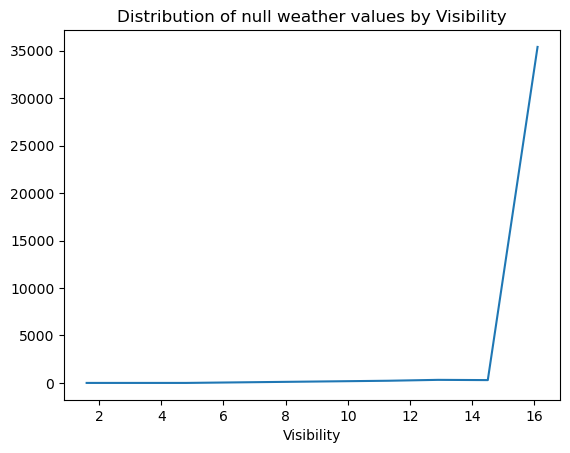

In [62]:
#looking at how many rows are null by visibility values
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count().plot()

plt.title('Distribution of null weather values by Visibility')

Text(0.5, 1.0, 'Distribution of null weather values by Precipitation')

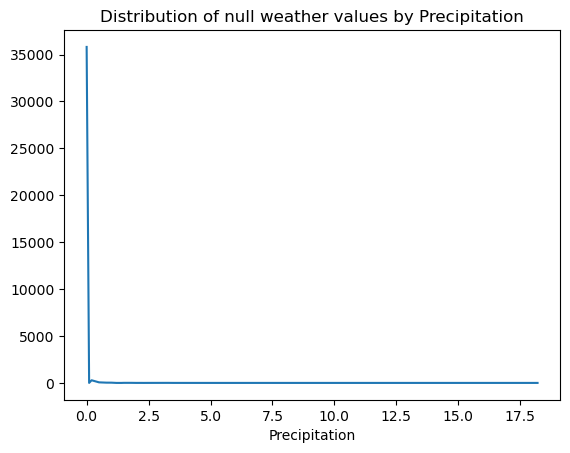

In [63]:
#looking at how many rows are null by precipitation values
df[df['Weather'] == 'LegendNANA'].groupby('Precipitation')['Weather'].count().plot()

plt.title('Distribution of null weather values by Precipitation')

This lineplot isn't surprising, considering that visibility at 16.1 km accounts for 84% of the data when the weather is null and 85% when precipitation is 0.0 mm. Let's start with the imputation.

In [64]:
#looking at how many missing rows there are by visibility value
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count()

Visibility
1.6         3
2.0         3
4.8         3
11.3      232
12.9      326
14.5      300
16.1    35405
Name: Weather, dtype: int64

Just quickly impute the null values where there is only 3 rows each. 

In [65]:
df[(df.Visibility==1.6) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
34513,2023-03-03 21:00:00,0.4,1.5,NaN,NaN,55,1.6,LegendNANA,2023-03-03 21:10:00,Friday,504,DUNDAS WEST STATION,Collision - TTC Involved,10,20
34514,2023-03-03 21:00:00,0.4,1.5,NaN,NaN,55,1.6,LegendNANA,2023-03-03 21:17:00,Friday,512,ST CLAIR AND DUFFERIN,Held By,8,18
34515,2023-03-03 21:00:00,0.4,1.5,NaN,NaN,55,1.6,LegendNANA,2023-03-03 21:56:00,Friday,504,BROADVIEW AND QUEEN,Operations,10,20


In [66]:
df[(df.Visibility==2.0) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
34516,2023-03-03 22:00:00,0.4,3.5,NaN,NaN,58,2.0,LegendNANA,2023-03-03 22:12:00,Friday,504,KING AND PARLIAMENT,Operations,10,20
34517,2023-03-03 22:00:00,0.4,3.5,NaN,NaN,58,2.0,LegendNANA,2023-03-03 22:16:00,Friday,504,DUNDAS AND PARLIAMENT,Operations,10,20
34518,2023-03-03 22:00:00,0.4,3.5,NaN,NaN,58,2.0,LegendNANA,2023-03-03 22:32:00,Friday,505,GERRAND AND BROADVIEW,Operations,10,20


In [67]:
#both null values are located on 2023-3-3
df[df.Datetime.dt.date==pd.Timestamp(2023, 3,3)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
34497,2023-03-03 02:00:00,0.1,0.0,NaN,NaN,11,16.1,LegendNANA,2023-03-03 02:57:00,Friday,501,QUEEN AND KINGSTON,Security,11,31
34498,2023-03-03 04:00:00,-1.1,0.0,NaN,-7.0,26,16.1,LegendNANA,2023-03-03 04:13:00,Friday,501,NEVILLE LOOP,Security,0,0
34499,2023-03-03 05:00:00,-1.3,0.0,NaN,-7.0,24,16.1,LegendNANA,2023-03-03 05:34:00,Friday,501,QUEEN AND RONCESVALLES,Security,9,18
34500,2023-03-03 06:00:00,-1.2,0.0,NaN,-8.0,28,16.1,LegendNANA,2023-03-03 06:15:00,Friday,501,WESTON AND SENECA,Mechanical,5,10
34501,2023-03-03 07:00:00,0.4,0.0,NaN,NaN,28,16.1,LegendNANA,2023-03-03 07:35:00,Friday,503,BINGHAM LOOP,Mechanical,8,16
34502,2023-03-03 08:00:00,0.3,0.0,NaN,NaN,30,16.1,LegendNANA,2023-03-03 08:04:00,Friday,506,COLLEGE AND QUEENS PAR,Collision - TTC Involved,9,18
34503,2023-03-03 08:00:00,0.3,0.0,NaN,NaN,30,16.1,LegendNANA,2023-03-03 08:12:00,Friday,510,QUEENS QUAY,Security,8,16
34504,2023-03-03 08:00:00,0.3,0.0,NaN,NaN,30,16.1,LegendNANA,2023-03-03 08:35:00,Friday,504,DUFFERIN AND KING,Operations,5,10
34505,2023-03-03 09:00:00,0.2,0.0,NaN,NaN,39,16.1,LegendNANA,2023-03-03 09:42:00,Friday,510,CHARLOTTE AND ADELAIDE,Security,0,0
34506,2023-03-03 12:00:00,1.0,0.0,NaN,NaN,39,16.1,LegendNANA,2023-03-03 12:23:00,Friday,512,YONGE AND ST CLAIR,Collision - TTC Involved,8,16


On March 3, 2023, the visibility drops to 1.6 km, and the precipitation value changes accordingly. Taking this fact into account, let's fill in the null values with a condition set when we work on rows with larger value counts.

In [68]:
#right now, there are only 3 rows to fill each, so let's handle this now
#fill in 'snow' when visibility is 1.6
condition= df.Visibility == 1.6
df.loc[condition, 'Weather'] = df.loc[condition, 'Weather'].replace('LegendNANA', 'Snow')

In [69]:
#fill in 'snow' when visibility is 2.0
condition1= df.Visibility == 2.0
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Snow')

In [70]:
#How does this look?
df[(df.Visibility==4.8) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
23198,2022-05-27 09:00:00,14.2,0.0,NaN,NaN,17,4.8,LegendNANA,2022-05-27 09:26:00,Friday,504,KING AND PARLIAMENT,Emergency Services,5,10
23199,2022-05-27 10:00:00,14.5,0.2,NaN,NaN,5,4.8,LegendNANA,2022-05-27 10:12:00,Friday,504,EXHIBITION LOOP,Mechanical,5,10
23200,2022-05-27 10:00:00,14.5,0.2,NaN,NaN,5,4.8,LegendNANA,2022-05-27 10:59:00,Friday,501,QUEEN AND UNIVERSITY,Mechanical,10,20


In [71]:
df[df.Datetime.dt.date==pd.Timestamp(2022, 5,27)]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
23190,2022-05-27 02:00:00,15.1,0.0,NaN,NaN,8,16.1,LegendNANA,2022-05-27 02:32:00,Friday,510,KINGSTON RD LOOP,Security,0,0
23191,2022-05-27 05:00:00,13.8,0.2,NaN,NaN,5,16.1,Rain,2022-05-27 05:23:00,Friday,505,DUNDAS AND REGENT ST,Security,13,22
23192,2022-05-27 05:00:00,13.8,0.2,NaN,NaN,5,16.1,Rain,2022-05-27 05:46:00,Friday,512,ST CLAIR STATION,Late Entering Service,10,24
23193,2022-05-27 06:00:00,14.5,0.8,NaN,NaN,5,16.1,Rain,2022-05-27 06:40:00,Friday,505,PARKSIDE DR AND HOWARD,Held By,11,19
23194,2022-05-27 06:00:00,14.5,0.8,NaN,NaN,5,16.1,Rain,2022-05-27 06:44:00,Friday,506,HIGH PARK LOOP,Security,10,19
23195,2022-05-27 07:00:00,13.9,0.8,NaN,NaN,5,1.2,Rain,2022-05-27 07:19:00,Friday,512,ST CLAIR WEST STATION,Operations,5,10
23196,2022-05-27 08:00:00,14.2,0.0,NaN,NaN,9,2.8,"Rain, Fog",2022-05-27 08:13:00,Friday,501,QUEEN AND WOODFIELD,Emergency Services,9,16
23197,2022-05-27 08:00:00,14.2,0.0,NaN,NaN,9,2.8,"Rain, Fog",2022-05-27 08:50:00,Friday,501,LAKESHORE AND FLEECELI,Diversion,99,108
23198,2022-05-27 09:00:00,14.2,0.0,NaN,NaN,17,4.8,LegendNANA,2022-05-27 09:26:00,Friday,504,KING AND PARLIAMENT,Emergency Services,5,10
23199,2022-05-27 10:00:00,14.5,0.2,NaN,NaN,5,4.8,LegendNANA,2022-05-27 10:12:00,Friday,504,EXHIBITION LOOP,Mechanical,5,10


In this dataframe, we will note that when precipitation has a value of 0.0 mm and visibility is below 4.8km, we can replace `Rain, Fog` with `Fog` because it didn't rain. So we will replace this null value to `Fog` as well.

In [72]:
#fill in 'Fog' when visibility is 4.8
condition1= df.Visibility == 4.8
df.loc[condition1, 'Weather'] = df.loc[condition1, 'Weather'].replace('LegendNANA', 'Fog')

In [73]:
#now let's work on the larger ones 
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count()

Visibility
11.3      232
12.9      326
14.5      300
16.1    35405
Name: Weather, dtype: int64

In [74]:
#How does this look?
df[(df.Visibility==11.3) & (df.Weather=='LegendNANA')]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
135,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11,11.3,LegendNANA,2021-01-04 09:19:00,Monday,505,DUNDAS WEST STATION,Operations,5,9
136,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11,11.3,LegendNANA,2021-01-04 09:19:00,Monday,506,LANSDOWNE AND COLLEGE,Operations,7,14
137,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11,11.3,LegendNANA,2021-01-04 09:22:00,Monday,510,SPADINA AND QUEENS QUA,Utilized Off Route,9,17
138,2021-01-04 09:00:00,0.4,0.0,NaN,NaN,11,11.3,LegendNANA,2021-01-04 09:26:00,Monday,506,MAIN STREET STATION,Operations,8,16
174,2021-01-05 09:00:00,0.8,0.0,NaN,NaN,15,11.3,LegendNANA,2021-01-05 09:10:00,Tuesday,501,RONCESVALLES AND QUEEN,Operations,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41833,2023-09-14 13:00:00,17.8,0.0,NaN,NaN,13,11.3,LegendNANA,2023-09-14 13:10:00,Thursday,504,QUEEN AND COXWELL,Rail/Switches,0,0
42041,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,8,11.3,LegendNANA,2023-09-20 18:11:00,Wednesday,503,QUEEN AND BASEBALL,Collision - TTC Involved,10,20
42042,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,8,11.3,LegendNANA,2023-09-20 18:15:00,Wednesday,505,DUNDAS AND JARVIS,Diversion,30,40
42043,2023-09-20 18:00:00,17.6,0.0,NaN,NaN,8,11.3,LegendNANA,2023-09-20 18:20:00,Wednesday,506,GERRARD AND LOGAN,Mechanical,10,20


In [75]:
#what does this look like overall?
df[df.Visibility==11.3].sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
458,2021-01-14 02:00:00,2.0,0.0,NaN,NaN,8,11.3,LegendNANA,2021-01-14 02:05:00,Thursday,501,QUEENSWAY AND RONCESVA,Cleaning,6,12
14084,2021-12-27 21:00:00,0.2,0.0,NaN,NaN,32,11.3,LegendNANA,2021-12-27 21:03:00,Monday,504,ENTIRE ROUTE,General Delay,6,12
16409,2022-01-24 12:00:00,-6.5,0.0,NaN,-12.0,15,11.3,Snow,2022-01-24 12:51:00,Monday,501,BROADVIEW AND BAIN,General Delay,8,16
8036,2021-08-10 02:00:00,24.5,0.0,35.0,NaN,4,11.3,LegendNANA,2021-08-10 02:37:00,Tuesday,501,QUEEN AND CONNAUGHT,Emergency Services,34,64
34186,2023-02-23 19:00:00,-2.5,0.0,NaN,-9.0,26,11.3,"Rain, Snow",2023-02-23 19:14:00,Thursday,509,QUEENS QUAY AND BATHUR,General Delay,0,0
996,2021-01-31 14:00:00,-5.0,0.0,NaN,-15.0,45,11.3,LegendNANA,2021-01-31 14:00:00,Sunday,506,MAIN STATION,Operations,5,10
19252,2022-03-19 17:00:00,4.4,0.0,NaN,NaN,15,11.3,LegendNANA,2022-03-19 17:55:00,Saturday,501,QUEEN AND LESLIE,Operations,8,16
13983,2021-12-25 09:00:00,4.4,0.8,NaN,NaN,5,11.3,Rain,2021-12-25 09:17:00,Saturday,512,YORK MILLS STATION,Utilized Off Route,19,39
19962,2022-04-01 07:00:00,1.0,0.0,NaN,NaN,22,11.3,Snow,2022-04-01 07:00:00,Friday,506,CARLTON ROUTE,Operations,7,15
31911,2022-12-23 03:00:00,4.0,0.2,NaN,NaN,28,11.3,Rain,2022-12-23 03:13:00,Friday,501,QUEEN AND NEVILLE,Security,29,49


In [76]:
#what does the value label look like in df?
df[df.Visibility==12.9].sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
11593,2021-11-05 00:00:00,3.3,0.0,NaN,NaN,11,12.9,LegendNANA,2021-11-05 00:50:00,Friday,501,QUEEN AND WOODBINE,Cleaning - Unsanitary,10,20
13223,2021-12-10 20:00:00,4.2,0.0,NaN,NaN,28,12.9,LegendNANA,2021-12-10 20:17:00,Friday,501,BROADVIEW AND GERRARD,Operations,8,16
16609,2022-01-27 23:00:00,-3.6,0.0,NaN,-11.0,28,12.9,Snow,2022-01-27 23:13:00,Thursday,501,QUEEN AND BROADVIEW,Utilized Off Route,9,108
505,2021-01-15 23:00:00,3.4,0.0,NaN,NaN,18,12.9,Rain,2021-01-15 23:22:00,Friday,501,QUEEN AND VICTORIA,Emergency Services,6,12
9659,2021-09-17 19:00:00,20.1,0.0,27.0,NaN,11,12.9,LegendNANA,2021-09-17 19:13:00,Friday,511,BATHURST STATION,Operations,9,18
583,2021-01-18 23:00:00,-0.7,0.0,NaN,-4.0,11,12.9,Snow,2021-01-18 23:31:00,Monday,501,NEVILLE PARK LOOP,Cleaning,10,20
30440,2022-11-16 06:00:00,-0.3,0.0,NaN,-4.0,13,12.9,Snow,2022-11-16 06:30:00,Wednesday,506,BROADVIEW AND GERRARD,Mechanical,134,143
13226,2021-12-10 20:00:00,4.2,0.0,NaN,NaN,28,12.9,LegendNANA,2021-12-10 20:44:00,Friday,504,BERKELEY AND KING,Mechanical,6,12
16924,2022-02-03 17:00:00,-7.4,0.0,NaN,-15.0,24,12.9,Snow,2022-02-03 17:30:00,Thursday,506,GERRARD AND PARLIAMENT,Diversion,35,44
14558,2021-12-31 18:00:00,4.9,0.0,NaN,NaN,9,12.9,LegendNANA,2021-12-31 18:07:00,Friday,504,KING AND SUMACH,Operations,6,12


In [77]:
#what does the value label look like in df?
df[df.Visibility==14.5].sample(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
19253,2022-03-19 18:00:00,5.3,0.2,NaN,NaN,8,14.5,LegendNANA,2022-03-19 18:05:00,Saturday,505,DUNDAS AND CHURCH,Operations,6,13
42361,2023-09-30 02:00:00,16.3,0.0,NaN,NaN,8,14.5,LegendNANA,2023-09-30 02:26:00,Saturday,510,328 BLOOR STREET WEST,Cleaning - Unsanitary,10,20
21865,2022-05-03 07:00:00,8.0,0.0,NaN,NaN,13,14.5,LegendNANA,2022-05-03 07:02:00,Tuesday,510,401 MARTIN GOODMAN TRA,Operations,9,18
4285,2021-04-28 21:00:00,8.2,0.0,NaN,NaN,11,14.5,LegendNANA,2021-04-28 21:16:00,Wednesday,501,DUFFERIN AND KING,Cleaning,10,20
33211,2023-01-29 05:00:00,1.1,0.0,NaN,NaN,32,14.5,Snow,2023-01-29 05:54:00,Sunday,509,CANADIAN NATIONAL EXHI,Operations,10,20
39088,2023-06-27 19:00:00,20.5,0.0,25.0,NaN,35,14.5,LegendNANA,2023-06-27 19:04:00,Tuesday,510,SPADINA AND QUEEN,Mechanical,10,20
7210,2021-07-19 13:00:00,26.3,0.0,NaN,NaN,NaN,14.5,NaN,2021-07-19 13:49:00,Monday,506,GERRARD AND COXWELL,General Delay,8,16
38585,2023-06-12 00:00:00,16.2,1.0,NaN,NaN,32,14.5,Rain,2023-06-12 00:43:00,Monday,504,BATHURST AND WOLSELEY,Operations,10,20
492,2021-01-15 17:00:00,4.5,0.0,NaN,NaN,28,14.5,LegendNANA,2021-01-15 17:10:00,Friday,501,QUEEN AND RONCESVALLES,Security,6,12
13968,2021-12-24 23:00:00,3.0,0.0,NaN,NaN,37,14.5,LegendNANA,2021-12-24 23:51:00,Friday,510,SPADINA AND FRONT,Mechanical,9,18


When there is a value already assigned to the weather column, with a visibility of 11.3-14.5km and a precipitation value higher than 0.0mm, it is currently identified as `Rain` or `Snow`. Given this, let's replace it with `Cloudy`.

In [78]:
#replacing LegendNANA to the following under a precipitation condition
for index, condition in df.iterrows():
    if condition['Precipitation'] == 0.0:
        if condition['Visibility'] == 16.1:
            df.at[index, 'Weather'] = 'Clear'
        if condition['Visibility'] <= 14.5:
            df.at[index, 'Weather'] = 'Cloudy'

In [79]:
#rechecking how much is left when there is a value in precipitation
df[df['Weather'] == 'LegendNANA'].groupby('Visibility')['Weather'].count()

Visibility
11.3     17
12.9     27
14.5     19
16.1    389
Name: Weather, dtype: int64

In [80]:
#let's look at the rows
df.loc[df.Weather=='LegendNANA', :].sort_values('Datetime')

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
113,2021-01-03 14:00:00,1.4,0.2,NaN,NaN,9,14.5,LegendNANA,2021-01-03 14:50:00,Sunday,501,LONG BRANCH LOOP,Security,8,16
114,2021-01-03 14:00:00,1.4,0.2,NaN,NaN,9,14.5,LegendNANA,2021-01-03 14:55:00,Sunday,511,BATHURST AND FLEET,Collision - TTC Involved,14,21
2016,2021-03-01 00:00:00,4.5,0.5,NaN,NaN,9,16.1,LegendNANA,2021-03-01 00:25:00,Monday,506,COLLEGE AND LANSDOWNE,Security,6,12
2316,2021-03-11 19:00:00,12.3,1.0,NaN,NaN,32,16.1,LegendNANA,2021-03-11 19:01:00,Thursday,506,MAIN STREET STATION,Mechanical,6,12
2317,2021-03-11 19:00:00,12.3,1.0,NaN,NaN,32,16.1,LegendNANA,2021-03-11 19:18:00,Thursday,506,MAIN AND DANFORTH,Operations,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41373,2023-08-30 01:00:00,17.3,0.2,NaN,NaN,18,16.1,LegendNANA,2023-08-30 01:59:00,Wednesday,504,QUEEN AND LESLIE,Emergency Services,0,0
41597,2023-09-06 18:00:00,24.1,1.2,32.0,NaN,30,16.1,LegendNANA,2023-09-06 18:36:00,Wednesday,501,BATHURST AND QUEEN,Operations,7,14
41763,2023-09-12 10:00:00,20.7,0.2,27.0,NaN,17,16.1,LegendNANA,2023-09-12 10:10:00,Tuesday,509,QUEEN'S QUAY AND DAN L,Investigation,5,13
41762,2023-09-12 10:00:00,20.7,0.2,27.0,NaN,17,16.1,LegendNANA,2023-09-12 10:00:00,Tuesday,504,KING AND SIMCOE,Mechanical,10,20


In [81]:
#Now, let's use Precipitation to fill in the missing values
df[df['Weather'] == 'LegendNANA'].groupby('Precipitation')['Weather'].count()

Precipitation
0.1       3
0.2     283
0.5      62
0.8      30
1.0      28
1.2       2
1.4       1
1.5       7
1.8      10
2.0       3
2.2       4
2.3       2
2.5       4
3.3       7
5.6       1
6.8       2
8.9       1
18.2      2
Name: Weather, dtype: int64

[*Rain Rates*](https://water.usgs.gov/edu/activity-howmuchrain-metric.html):

- Slight rain: Less than 0.5 mm per hour.
- Moderate rain: Greater than 0.5 mm per hour, but less than 4.0 mm per hour.
- Heavy rain: Greater than 4 mm per hour, but less than 8 mm per hour.
- Very heavy rain: Greater than 8 mm per hour.


In [82]:
#Let's finish up
for index, condition in df.iterrows():
    if condition['Weather'] == 'LegendNANA':
        if condition['Precipitation'] <= 0.5:
            df.at[index, 'Weather'] = 'Rain'
        elif condition['Precipitation'] <= 4.0:
            df.at[index, 'Weather'] = 'Moderate Rain'
        elif condition['Precipitation'] > 4.0:
            df.at[index, 'Weather'] = 'Heavy Rain'

In [83]:
#final check of hidden nulls
df.Weather.value_counts(dropna=True)

Clear                               36601
Cloudy                               2741
Rain                                 1342
Rain, Fog                             657
Snow                                  449
Moderate Rain                         123
Fog                                    68
Moderate Rain, Fog                     49
Moderate Snow                          45
Thunderstorms, Rain                    30
Heavy Snow                             17
Thunderstorms                          13
Rain, Snow                             10
Heavy Rain                              9
Thunderstorms, Rain, Fog                9
Heavy Rain, Fog                         9
Thunderstorms,Moderate Rain             8
Freezing Rain, Fog                      7
Thunderstorms, Fog                      5
Thunderstorms,Heavy Rain, Fog           5
Thunderstorms,Moderate Rain, Fog        5
Haze                                    3
Thunderstorms,Heavy Rain                2
Thunderstorms, Freezing Rain      

In [84]:
#No missing values 
print(f'Weather missing value is now at {df.Weather.isna().sum()}.')

Weather missing value is now at 0.


Now let's clean the values to create dummy variable. When there was a `thunderstorm` alongside other weather conditions, we will remove the thunderstorm label since it is highly unlikely to impact the delay.

In [85]:
#starting with weather
weather_replace = {
    'Thunderstorms, Freezing Rain': 'Freezing Rain',
    'Thunderstorms, Heavy Rain': 'Heavy Rain',
    'Thunderstorms, Moderate Rain, Fog': 'Moderate Rain',
    'Thunderstorms, Heavy Rain, Fog': 'Heavy Rain',
    'Thunderstorms, Fog': 'Fog',
    'Freezing Rain, Fog': 'Freezing Rain',
    'Thunderstorms, Moderate Rain': 'Moderate Rain',
    'Heavy Rain, Fog': 'Heavy Rain',
    'Thunderstorms, Rain, Fog': 'Rain',
    'Thunderstorms, Rain': 'Rain',
    'Rain, Snow': 'Rain',
    'Thunderstorms,Heavy Rain': 'Heavy Rain',
    'Thunderstorms,Moderate Rain, Fog': 'Moderate Rain',
    'Thunderstorms,Heavy Rain, Fog': 'Heavy Rain',
    'Thunderstorms,Moderate Rain': 'Moderate Rain',
    'Moderate Rain, Fog': 'Moderate Rain',
    'Rain, Fog': 'Rain',
}

df['Weather'] = df['Weather'].replace(weather_replace)

In [155]:
#looks good
df['Weather'].value_counts().sort_values(ascending=False)

Clear            36367
Cloudy            2723
Rain              2034
Snow               446
Moderate Rain      185
Fog                 73
Moderate Snow       45
Heavy Rain          25
Heavy Snow          17
Thunderstorms       13
Freezing Rain       10
Haze                 3
Name: Weather, dtype: int64

---

### Imputing Line values

In [87]:
#checking datatype
df.Line.dtype

dtype('O')

In [88]:
df.Line.value_counts(dropna=False)

501                      11843
504                       8111
506                       5681
505                       4938
510                       3649
512                       2467
511                       1837
509                       1351
503                       1066
301                        330
NaN                        216
306                        190
304                        134
310                         84
555                         67
500                         57
600                         52
RAD                         41
999                         31
513                         15
705                          9
OTC                          7
508                          4
312                          3
507                          2
54                           2
615                          1
TEST                         1
5101                         1
540                          1
502                          1
503 KINGSTON ROAD (60        1
RUN     

`Line` has obvious typos, irregular patterns(outliers), and null values. Let's start of by cleaning typos.

In [89]:
#Replacing 
df['Line'].replace(['503 KINGSTON ROAD (60','RAD 506',], ['503','506'], inplace=True)

In [90]:
df['Line'].replace(['RUN','(RAD'], ['RAD','RAD'], inplace=True)

In [91]:
df['Line'].replace('TEST CAR', 'TEST', inplace=True)

In [92]:
df[df['Line'] == 'STORM']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
33942,2023-02-17 05:00:00,-1.4,0.0,NaN,-8.0,26,9.7,Cloudy,2023-02-17 05:10:00,Friday,STORM,ST CLAIR AND BATHURST,General Delay,37,45


In [93]:
#What is the acutal Line for this row?
df[df['Location'] == 'ST CLAIR AND BATHURST'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
60,2021-01-02 08:00:00,-0.5,0.0,NaN,-5.0,13,16.1,Clear,2021-01-02 08:19:00,Saturday,512,ST CLAIR AND BATHURST,General Delay,5,10
62,2021-01-02 08:00:00,-0.5,0.0,NaN,-5.0,13,16.1,Clear,2021-01-02 08:22:00,Saturday,512,ST CLAIR AND BATHURST,General Delay,8,16
572,2021-01-18 15:00:00,0.6,0.0,NaN,NaN,8,16.1,Clear,2021-01-18 15:36:00,Monday,512,ST CLAIR AND BATHURST,Operations,10,20


In [94]:
#Replacing 
df['Line'].replace('STORM', '512', inplace=True)

In [95]:
#replace what seems to be typos
df[df['Line']=='5014']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
28070,2022-09-16 23:00:00,18.4,0.0,NaN,NaN,35,16.1,Clear,2022-09-16 23:29:00,Friday,5014,KING AND SPADINA,General Delay,0,0


In [96]:
df[df['Location'] == 'KING AND SPADINA'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
94,2021-01-02 19:00:00,1.5,0.0,NaN,NaN,8,16.1,Clear,2021-01-02 19:39:00,Saturday,504,KING AND SPADINA,Security,0,0
97,2021-01-02 21:00:00,1.6,0.0,NaN,NaN,0,16.1,Clear,2021-01-02 21:56:00,Saturday,504,KING AND SPADINA,Emergency Services,17,26
350,2021-01-09 17:00:00,2.0,0.0,NaN,NaN,18,16.1,Clear,2021-01-09 17:39:00,Saturday,504,KING AND SPADINA,Held By,7,11


In [97]:
df['Line'].replace('5014', '504', inplace=True)

In [98]:
df[df['Line']=='5204']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
34571,2023-03-04 16:00:00,5.7,0.0,NaN,NaN,21,16.1,Clear,2023-03-04 16:52:00,Saturday,5204,2365 DUNDAS ST W,Operations,7,14


In [99]:
df[df['Location'] == '2365 DUNDAS ST W'].head(3)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
28457,2022-09-26 14:00:00,16.1,0.0,NaN,NaN,30,16.1,Clear,2022-09-26 14:16:00,Monday,504,2365 DUNDAS ST W,Operations,8,16
34571,2023-03-04 16:00:00,5.7,0.0,NaN,NaN,21,16.1,Clear,2023-03-04 16:52:00,Saturday,5204,2365 DUNDAS ST W,Operations,7,14
38573,2023-06-12 14:00:00,16.3,0.2,NaN,NaN,26,4.8,Rain,2023-06-12 14:49:00,Monday,504,2365 DUNDAS ST W,Mechanical,0,0


In [100]:
df['Line'].replace('5204', '504', inplace=True)

In [101]:
df[df['Line']=='5101']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
35383,2023-03-26 18:00:00,9.0,0.0,NaN,NaN,24,16.1,Clear,2023-03-26 18:02:00,Sunday,5101,QUEEN AND RONCESVALLE,Security,7,14


In [102]:
df[df['Location'] == 'QUEEN AND RONCESVALLE']

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
14997,2022-01-05 13:00:00,4.2,0.0,NaN,NaN,26,16.1,Clear,2022-01-05 13:04:00,Wednesday,501,QUEEN AND RONCESVALLE,Operations,10,20
35383,2023-03-26 18:00:00,9.0,0.0,NaN,NaN,24,16.1,Clear,2023-03-26 18:02:00,Sunday,5101,QUEEN AND RONCESVALLE,Security,7,14
36091,2023-04-12 20:00:00,11.9,0.0,NaN,NaN,13,16.1,Clear,2023-04-12 20:05:00,Wednesday,506,QUEEN AND RONCESVALLE,Security,0,0
40687,2023-08-13 10:00:00,21.6,0.0,25.0,NaN,22,16.1,Clear,2023-08-13 10:25:00,Sunday,501,QUEEN AND RONCESVALLE,Emergency Services,28,36


In [103]:
df['Line'].replace('5101', '501', inplace=True)

In [104]:
#Drop the rows with RAD and OTC and TEST, and make this into a numerical column. 
#The goal is to predict the delays so we don't need TEST, RAD, and OTC streetcar time.

condition = df['Line'].isin(['TEST', 'RAD', 'OTC'])
print(f'Potential drop shape: {df[condition].shape}')
df[condition].shape[0]/df.shape[0]*100

Potential drop shape: (52, 15)


0.12319355602937693

In [105]:
#dropping because the impact will be minimal.
df=df.drop(df[condition].index)
df.Line.value_counts()

501    11844
504     8113
506     5682
505     4938
510     3649
512     2468
511     1837
509     1351
503     1067
301      330
306      190
304      134
310       84
555       67
500       57
600       52
999       31
513       15
705        9
508        4
312        3
507        2
54         2
37         1
202        1
502        1
540        1
899        1
960        1
300        1
70         1
88         1
47         1
41         1
707        1
615        1
Name: Line, dtype: int64

In [106]:
#checking how much the null value affects the whole dataset
df.Line.isna().sum()/df.shape[0]*100

0.5123582712652403

In [107]:
df.loc[df.Line.isna(),:]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap
219,2021-01-06 07:00:00,0.0,0.0,NaN,-4.0,13,16.1,Clear,2021-01-06 07:38:00,Wednesday,NaN,RONCESVALLES CARHOUSE,Overhead,0,0
512,2021-01-16 06:00:00,0.7,0.0,NaN,NaN,13,16.1,Clear,2021-01-16 06:15:00,Saturday,NaN,RUSSELL YARD,Emergency Services,0,0
1091,2021-02-03 16:00:00,0.9,0.0,NaN,NaN,28,16.1,Clear,2021-02-03 16:55:00,Wednesday,NaN,BROADVIEW STATION,Operations,0,0
1128,2021-02-04 23:00:00,2.8,0.0,NaN,NaN,18,16.1,Clear,2021-02-04 23:47:00,Thursday,NaN,BATHURST AND COLLEGE,Overhead,0,0
1236,2021-02-08 11:00:00,-8.5,0.0,NaN,-15.0,15,16.1,Clear,2021-02-08 11:39:00,Monday,NaN,RONCESVALLES DIV,Operations,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41524,2023-09-04 14:00:00,27.1,0.0,36.0,NaN,8,16.1,Clear,2023-09-04 14:30:00,Monday,NaN,CNE LOOP,Emergency Services,0,0
41578,2023-09-05 00:00:00,21.6,0.0,29.0,NaN,11,16.1,Clear,2023-09-05 00:33:00,Tuesday,NaN,KINGSTON LOOP,Emergency Services,0,0
41754,2023-09-12 07:00:00,19.1,1.0,NaN,NaN,8,11.3,Rain,2023-09-12 07:41:00,Tuesday,NaN,QUEEN AND BROADVIEW,Rail/Switches,0,0
41841,2023-09-14 22:00:00,17.0,0.0,NaN,NaN,13,16.1,Clear,2023-09-14 22:05:00,Thursday,NaN,BROADVIEW AND SPARKHAL,General Delay,0,0


In [108]:
df['Line'].isna().sum()

216

In [109]:
#looking into missing line values by location
df[df['Line'].isna()].groupby('Location')['Line'].count()

Location
(NONE PROVIDED)           0
391 ALLIANCE              0
7972 CANADA BLVD          0
ADELAIDE AND YORK         0
BATHURST & HILLCREST      0
                         ..
TORONTO TRANSIT COMMIS    0
UNION LOOP EE             0
UNION STATION             0
UNKNOWN LOCATION          0
VICTORIA PARK STATION     0
Name: Line, Length: 121, dtype: int64

Just drop all the null values since they constitute only 0.1% of the entire dataset, and no patterns have been identified. Also, `Line` is not a crucial variable for predicting delays.

In [110]:
# Let's drop the last missing value
df.dropna(subset = ['Line'], inplace=True)

In [111]:
#no missing value
print(f'Line missing value is now at {df.Line.isna().sum()}.')

Line missing value is now at 0.


In [112]:
#change Line into integer

df['Line'] = df['Line'].astype(str).astype(int)

Text(0, 0.5, 'Count')

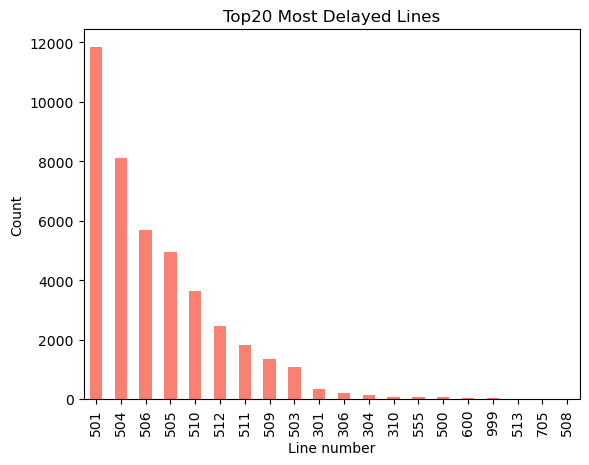

In [113]:
df.Line.value_counts().sort_values(ascending=False).head(20).plot(kind='bar', color='salmon')

plt.title('Top20 Most Delayed Lines')
plt.xlabel('Line number')
plt.ylabel('Count')

It looks like the Queen street line, 501 streetcar has the most delayed frequencies and then the King street line, 504 streetcar. 

---
### Working on Delaytime values 

In [114]:
#checking datatype 
df.Delaytime

0       2021-01-01 03:15:00
1       2021-01-01 03:37:00
2       2021-01-01 04:00:00
3       2021-01-01 04:03:00
4       2021-01-01 05:37:00
                ...        
42397   2023-09-30 22:53:00
42398   2023-09-30 23:21:00
42399   2023-09-30 23:41:00
42400   2023-09-30 00:48:00
42401   2023-09-30 01:22:00
Name: Delaytime, Length: 41942, dtype: datetime64[ns]

Finally, let's break down the values into five columns as year, month, date, hour, and minute to be used in a later model.

In [115]:
df['Year'] = df['Delaytime'].dt.year
df['Month'] = df['Delaytime'].dt.month
df['Date'] = df['Delaytime'].dt.day
df['Hour'] = df['Delaytime'].dt.hour
df['Minute'] = df['Delaytime'].dt.minute

In [116]:
#checking
df.head(10)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap,Year,Month,Date,Hour,Minute
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,Clear,2021-01-01 03:15:00,Friday,501,QUEEN AND MCCAUL,Operations,19,24,2021,1,1,3,15
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,Clear,2021-01-01 03:37:00,Friday,504,BROADVIEW AND QUEEN,Operations,15,30,2021,1,1,3,37
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,Clear,2021-01-01 04:00:00,Friday,504,BROADVIEW STATION,Cleaning,15,30,2021,1,1,4,0
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,Clear,2021-01-01 04:03:00,Friday,504,DUNDAS WEST STATION,Cleaning,15,30,2021,1,1,4,3
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,5,16.1,Clear,2021-01-01 05:37:00,Friday,506,MAIN STATION,Mechanical,10,20,2021,1,1,5,37
5,2021-01-01 06:00:00,0.0,0.0,NaN,NaN,0,16.1,Clear,2021-01-01 06:00:00,Friday,555,TORONTO TRANSIT COMMIS,General Delay,0,0,2021,1,1,6,0
6,2021-01-01 06:00:00,0.0,0.0,NaN,NaN,0,16.1,Clear,2021-01-01 06:59:00,Friday,501,RUSSELL YARD,Emergency Services,10,20,2021,1,1,6,59
7,2021-01-01 07:00:00,0.5,0.0,NaN,NaN,5,16.1,Clear,2021-01-01 07:55:00,Friday,504,KING AND QUEEN,Mechanical,10,20,2021,1,1,7,55
8,2021-01-01 09:00:00,1.4,0.0,NaN,NaN,8,16.1,Clear,2021-01-01 09:35:00,Friday,511,BATHURST AND QUEEN,Cleaning,8,16,2021,1,1,9,35
9,2021-01-01 09:00:00,1.4,0.0,NaN,NaN,8,16.1,Clear,2021-01-01 09:55:00,Friday,512,ST CLAIR STATION,Emergency Services,7,12,2021,1,1,9,55


Looks good. We will drop `Delaytime` after handling other variables.

In [117]:
#what's next?
df.isna().sum()

Datetime             0
Temperature          0
Precipitation        0
Summer_PT        34756
Winter_PT        34848
Wind_Speed          64
Visibility           0
Weather              0
Delaytime            0
Day                  0
Line                 0
Location             0
Incident             1
Min_Delay            0
Min_Gap              0
Year                 0
Month                0
Date                 0
Hour                 0
Minute               0
dtype: int64

In [118]:
#drop incident because there is only 1 row.
df.dropna(subset = ['Incident'], inplace=True)

In [119]:
#checking
df.isna().sum()

Datetime             0
Temperature          0
Precipitation        0
Summer_PT        34756
Winter_PT        34847
Wind_Speed          64
Visibility           0
Weather              0
Delaytime            0
Day                  0
Line                 0
Location             0
Incident             0
Min_Delay            0
Min_Gap              0
Year                 0
Month                0
Date                 0
Hour                 0
Minute               0
dtype: int64

Major imputation is complete, and we will now focus on the categorical values, converting them into dummy variables. We will drop the `Wind_Speed` column as it was used to fill in other weather variables. The speed of the wind doesn't look to be correlated with delays unless it's a stormy day.

---
### Working on Day values

We will map this column as it is an ordinal column. 

In [120]:
#confirming the values
df.Day.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [121]:
#Mapping Day
df['Day'] = df['Day'].map({'Monday': 0,'Tuesday': 1, 'Wednesday': 2,'Thursday':3, 'Friday':4 , 'Saturday':5, 'Sunday':6})

In [122]:
#confirming
df['Day'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [123]:
#great!
df.head()

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap,Year,Month,Date,Hour,Minute
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,Clear,2021-01-01 03:15:00,4,501,QUEEN AND MCCAUL,Operations,19,24,2021,1,1,3,15
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,5,16.1,Clear,2021-01-01 03:37:00,4,504,BROADVIEW AND QUEEN,Operations,15,30,2021,1,1,3,37
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,Clear,2021-01-01 04:00:00,4,504,BROADVIEW STATION,Cleaning,15,30,2021,1,1,4,0
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,5,16.1,Clear,2021-01-01 04:03:00,4,504,DUNDAS WEST STATION,Cleaning,15,30,2021,1,1,4,3
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,5,16.1,Clear,2021-01-01 05:37:00,4,506,MAIN STATION,Mechanical,10,20,2021,1,1,5,37


----
### Categorizing Min_Delay values

In [124]:
#Min_Delay: How long it was delayed by minute.
#looking at values
df.Min_Delay.value_counts().sort_index()

0      2893
1        39
2        65
3       246
4      1078
       ... 
944       1
948       2
960       1
980       1
981       1
Name: Min_Delay, Length: 337, dtype: int64

In [125]:
#Min_Gap: The time it took for the next train to arrive after the delayed train.
df.Min_Gap.value_counts().sort_index()

0      3115
1        40
2         1
3         3
4        16
       ... 
954       1
956       2
968       1
990       1
991       1
Name: Min_Gap, Length: 359, dtype: int64

We are working with already delayed data (which only gives us 1 classification), so when the `Min_Delay` is 0, we will treat this as on-time streetcar as the streetcar was not late or not recorded (creating 2 classification data). We don't think `Min_Gap` is an important column to do the analysis, so we will drop it. 

In [126]:
df.Min_Delay.describe()

count    41941.000000
mean        14.102692
std         34.576468
min          0.000000
25%          6.000000
50%          8.000000
75%         10.000000
max        981.000000
Name: Min_Delay, dtype: float64

There is a clear outlier here, the average delay time is 14 minutes, but the maximum delay time is 981 minutes.

In [127]:
#looking at the max delayed row
df[df.Min_Delay== 981]

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Wind_Speed,Visibility,Weather,Delaytime,Day,Line,Location,Incident,Min_Delay,Min_Gap,Year,Month,Date,Hour,Minute
7946,2021-08-08 06:00:00,21.8,0.0,30.0,NaN,8,4.8,Cloudy,2021-08-08 06:11:00,6,510,SPADINA AND CECIL,Investigation,981,991,2021,8,8,6,11


In [128]:
df.Min_Delay.nunique()

337

In [129]:
#show me all the values when the count is below 5

value_counts = df.Min_Delay.value_counts().sort_index()

value_below_5 = value_counts[value_counts <10]

value_below_5

72     5
81     2
83     6
86     6
88     5
      ..
944    1
948    2
960    1
980    1
981    1
Name: Min_Delay, Length: 237, dtype: int64

We will categorize these values to map for our logistic regression model later.

How we will categorize the `Min_Delay`: 

- On Time: When Min_Delay is 0.
- Moderate Delay: Delays between 1 to 30 minutes.
- Significant Delay: Delays between 31 to 60 minutes..
- Severe Delay: Delays greater than 60 minutes can be categorized as severe delays.

In [130]:
#categorizing
def categorize_delay(min_delay):
    if min_delay == 0:
        return "On Time"
    elif 1 <= min_delay <= 30:
        return "Moderate Delay"
    elif 31 <= min_delay <= 60:
        return "Significant Delay"
    else:
        return "Severe Delay"

df['Min_Delay'] = df['Min_Delay'].apply(categorize_delay)

In [131]:
#Yay
df.Min_Delay.value_counts()

Moderate Delay       36319
On Time               2893
Significant Delay     1523
Severe Delay          1206
Name: Min_Delay, dtype: int64

In [132]:
#Mapping min_delay
df['Min_Delay'] = df['Min_Delay'].map({'On Time': 0,'Moderate Delay': 1, 'Significant Delay': 2,'Severe Delay':3 })

In [133]:
#Min_Delay is ready for modeling
df.Min_Delay.value_counts()

1    36319
0     2893
2     1523
3     1206
Name: Min_Delay, dtype: int64

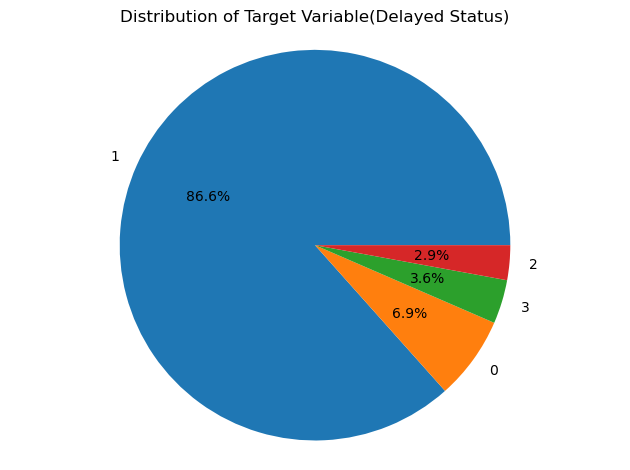

In [134]:
#Checking the distribution
labels = df.Min_Delay.unique()
sizes = df.Min_Delay.value_counts()


plt.figure()
plt.pie(sizes, labels=labels,autopct='%1.1f%%')

plt.title('Distribution of Target Variable(Delayed Status)')

plt.axis('equal')
plt.tight_layout()
plt.show()

### Cleaning Incident values

In [135]:
df.Incident.value_counts()

Operations                  15375
Mechanical                   4466
General Delay                3848
Security                     3662
Emergency Services           2894
Held By                      2876
Cleaning - Unsanitary        2125
Diversion                    1870
Collision - TTC Involved     1455
Utilized Off Route           1126
Cleaning                     1042
Investigation                 577
Overhead                      267
Rail/Switches                 130
Late                          100
Late Entering Service          79
Management                     17
Late Leaving Garage            14
Late                            9
Cleaning - Disinfection         9
Name: Incident, dtype: int64

In [136]:
#Replacing duplicated lables
df['Incident'].replace(['Cleaning - Unsanitary','Cleaning','Cleaning - Disinfection'], 'Cleaning', inplace=True)

In [137]:
#Replacing 
df['Incident'].replace(['Late  ','Late'], 'Late', inplace=True)

In [138]:
#looks good
df.Incident.value_counts()

Operations                  15375
Mechanical                   4466
General Delay                3848
Security                     3662
Cleaning                     3176
Emergency Services           2894
Held By                      2876
Diversion                    1870
Collision - TTC Involved     1455
Utilized Off Route           1126
Investigation                 577
Overhead                      267
Rail/Switches                 130
Late                          109
Late Entering Service          79
Management                     17
Late Leaving Garage            14
Name: Incident, dtype: int64

Text(0.5, 1.0, 'Top 10 Occurrences for Delay')

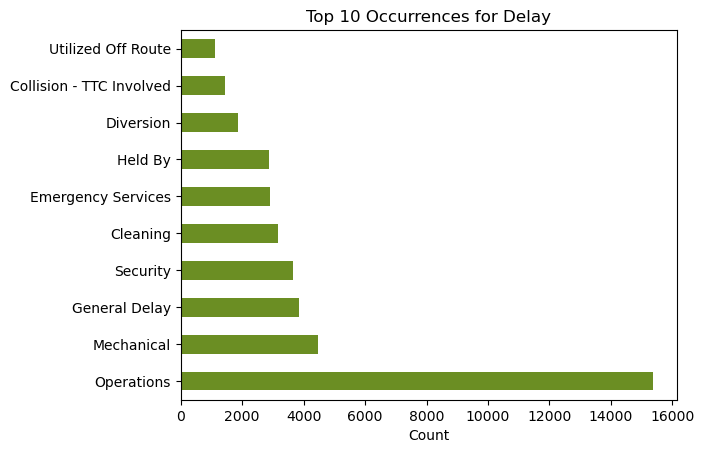

In [139]:
df.Incident.value_counts().sort_values(ascending=False).head(10).plot(kind='barh', color='olivedrab')

plt.xlabel('Count')
plt.title('Top 10 Occurrences for Delay')

Operations such as scheduling, staffing, coordination, or that impact regular operations seems to be the number one reason for delay. Mechanical delays could be due to engine failures, brake problems, or any malfunction related to the mechanical systems of the vehicle.

----
### Cleaning Location values

In [140]:
df.Location.nunique()

4259

In [141]:
df.Location.value_counts()

DUNDAS WEST STATION       1467
BROADVIEW STATION          859
SPADINA STATION            855
QUEEN AND RONCESVALLES     698
EXHIBITION LOOP            606
                          ... 
HUBBARD AND GERRARD          1
LAKESHORE AND 8TH            1
SPADINA AND BLUEJAY WA       1
KING AND WIDMER              1
1626 QUEEN ST EAST           1
Name: Location, Length: 4259, dtype: int64

In [142]:
punctuation = df[df['Location'].str.contains(r'[^\w\s]')]
punctuation.Location.unique()

array(["SPADINA AND QUEEN'S QU", "QUEEN'S QUAY LOOP",
       'LANSDOWNE LOOP - COLLE', 'QUEEN AND ST. PATRICK',
       "QUEEN'S QUAY AND SPADI", "QUEEN'S PARK AND UNIVE",
       "QUEEN'S QUAY STATION", 'BATHURST AND QUEEN (NO',
       'DUFFERIN AND KING (NOR', "QUEEN'S QUAY AND REES",
       'SPADINA STATION - SPAR', "QUEEN'S QUAY AND SIMCO",
       "BROWN'S LINE AND LAKES", 'QUEEN AND KING (W OF D',
       'KING AND PARLIMENT (WE', "GUNN'S LOOP", 'DUNDAS AND LAKEVIEW (E',
       'ST. CLAIR AND BATHURST', 'KING ST. E. AT RIVER S',
       "ST MICHAEL'S HOSPITAL", 'RONCESVALLES YARD- NOR',
       "QUEEN'S QUAY FERRY DOC", 'UNION STATION- STREETC',
       'LANSDOWNE LOOP @ 1050', "QUEEN AND O'HARA", '`MAIN STREET STATIN',
       'KING AND SPENCER (W OF', 'LANSDOWNE LOOP (DUNDAS',
       'HUMBER LOOP- LAKESHORE', 'CHURCH AND DUNDAS (NOR',
       "QUEEN'S QUAY AND LOWER", 'DUNDAS AND SHERIDAN (E',
       'KING AND SHAW (NORTH O', 'KING AND SPENCER AVE (',
       'QUEEN - STRACHAN TO GO', 'L

It makes more sense to drop `Location` as there are 4000 unique values, and we cannot use this variable to run a logistic regression model. Additionally, the location where the delay occurred is unlikely to provide critical information for our analysis, which focuses on predicting streetcar delays based on weather conditions.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41941 entries, 0 to 42401
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       41941 non-null  datetime64[ns]
 1   Temperature    41941 non-null  float64       
 2   Precipitation  41941 non-null  float64       
 3   Summer_PT      7185 non-null   float64       
 4   Winter_PT      7094 non-null   float64       
 5   Wind_Speed     41877 non-null  object        
 6   Visibility     41941 non-null  float64       
 7   Weather        41941 non-null  object        
 8   Delaytime      41941 non-null  datetime64[ns]
 9   Day            41941 non-null  int64         
 10  Line           41941 non-null  int64         
 11  Location       41941 non-null  object        
 12  Incident       41941 non-null  object        
 13  Min_Delay      41941 non-null  int64         
 14  Min_Gap        41941 non-null  int64         
 15  Year           4194

In [144]:
#drop win_speed too, we used this to fill in Weather. 
drops = ['Wind_Speed','Delaytime','Location','Min_Gap']

df=df.drop(drops, axis =1)

In [145]:
#after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41941 entries, 0 to 42401
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       41941 non-null  datetime64[ns]
 1   Temperature    41941 non-null  float64       
 2   Precipitation  41941 non-null  float64       
 3   Summer_PT      7185 non-null   float64       
 4   Winter_PT      7094 non-null   float64       
 5   Visibility     41941 non-null  float64       
 6   Weather        41941 non-null  object        
 7   Day            41941 non-null  int64         
 8   Line           41941 non-null  int64         
 9   Incident       41941 non-null  object        
 10  Min_Delay      41941 non-null  int64         
 11  Year           41941 non-null  int64         
 12  Month          41941 non-null  int64         
 13  Date           41941 non-null  int64         
 14  Hour           41941 non-null  int64         
 15  Minute         4194

In [146]:
#clean shape
df.shape

(41941, 16)

In [147]:
#clean sample
df.sample(5)

,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Weather,Day,Line,Incident,Min_Delay,Year,Month,Date,Hour,Minute
2080,2021-03-04 12:00:00,-3.8,0.0,NaN,-11.0,16.1,Clear,3,512,Security,2,2021,3,4,12,47
22559,2022-05-13 13:00:00,19.2,0.0,NaN,NaN,16.1,Clear,4,509,Operations,1,2022,5,13,13,55
18423,2022-03-04 19:00:00,-0.1,0.0,NaN,-6.0,16.1,Clear,4,501,Utilized Off Route,1,2022,3,4,19,33
35690,2023-04-03 09:00:00,4.9,0.0,NaN,NaN,16.1,Clear,0,504,Operations,1,2023,4,3,9,14
30350,2022-11-14 02:00:00,0.2,0.0,NaN,NaN,16.1,Clear,0,306,Security,0,2022,11,14,2,45


---

### Dummy variables

In [148]:
#Final cleaning
df.select_dtypes('object').columns

Index(['Weather', 'Incident'], dtype='object')

In [149]:
#In_placing dummy variables

tw = pd.get_dummies(df,columns=['Weather', 'Incident'], dtype=int,drop_first=True)
print(f'This is our final dataframe we will use to model: {tw.shape}.')
tw.head()

This is our final dataframe we will use to model: (41941, 41).


,Datetime,Temperature,Precipitation,Summer_PT,Winter_PT,Visibility,Day,Line,Min_Delay,Year,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,4,501,1,2021,...,0,0,0,0,0,1,0,0,0,0
1,2021-01-01 03:00:00,-2.0,0.0,NaN,-4.0,16.1,4,504,1,2021,...,0,0,0,0,0,1,0,0,0,0
2,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,4,504,1,2021,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01 04:00:00,-1.4,0.0,NaN,-3.0,16.1,4,504,1,2021,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01 05:00:00,0.4,0.0,NaN,NaN,16.1,4,506,1,2021,...,0,0,0,0,1,0,0,0,0,0


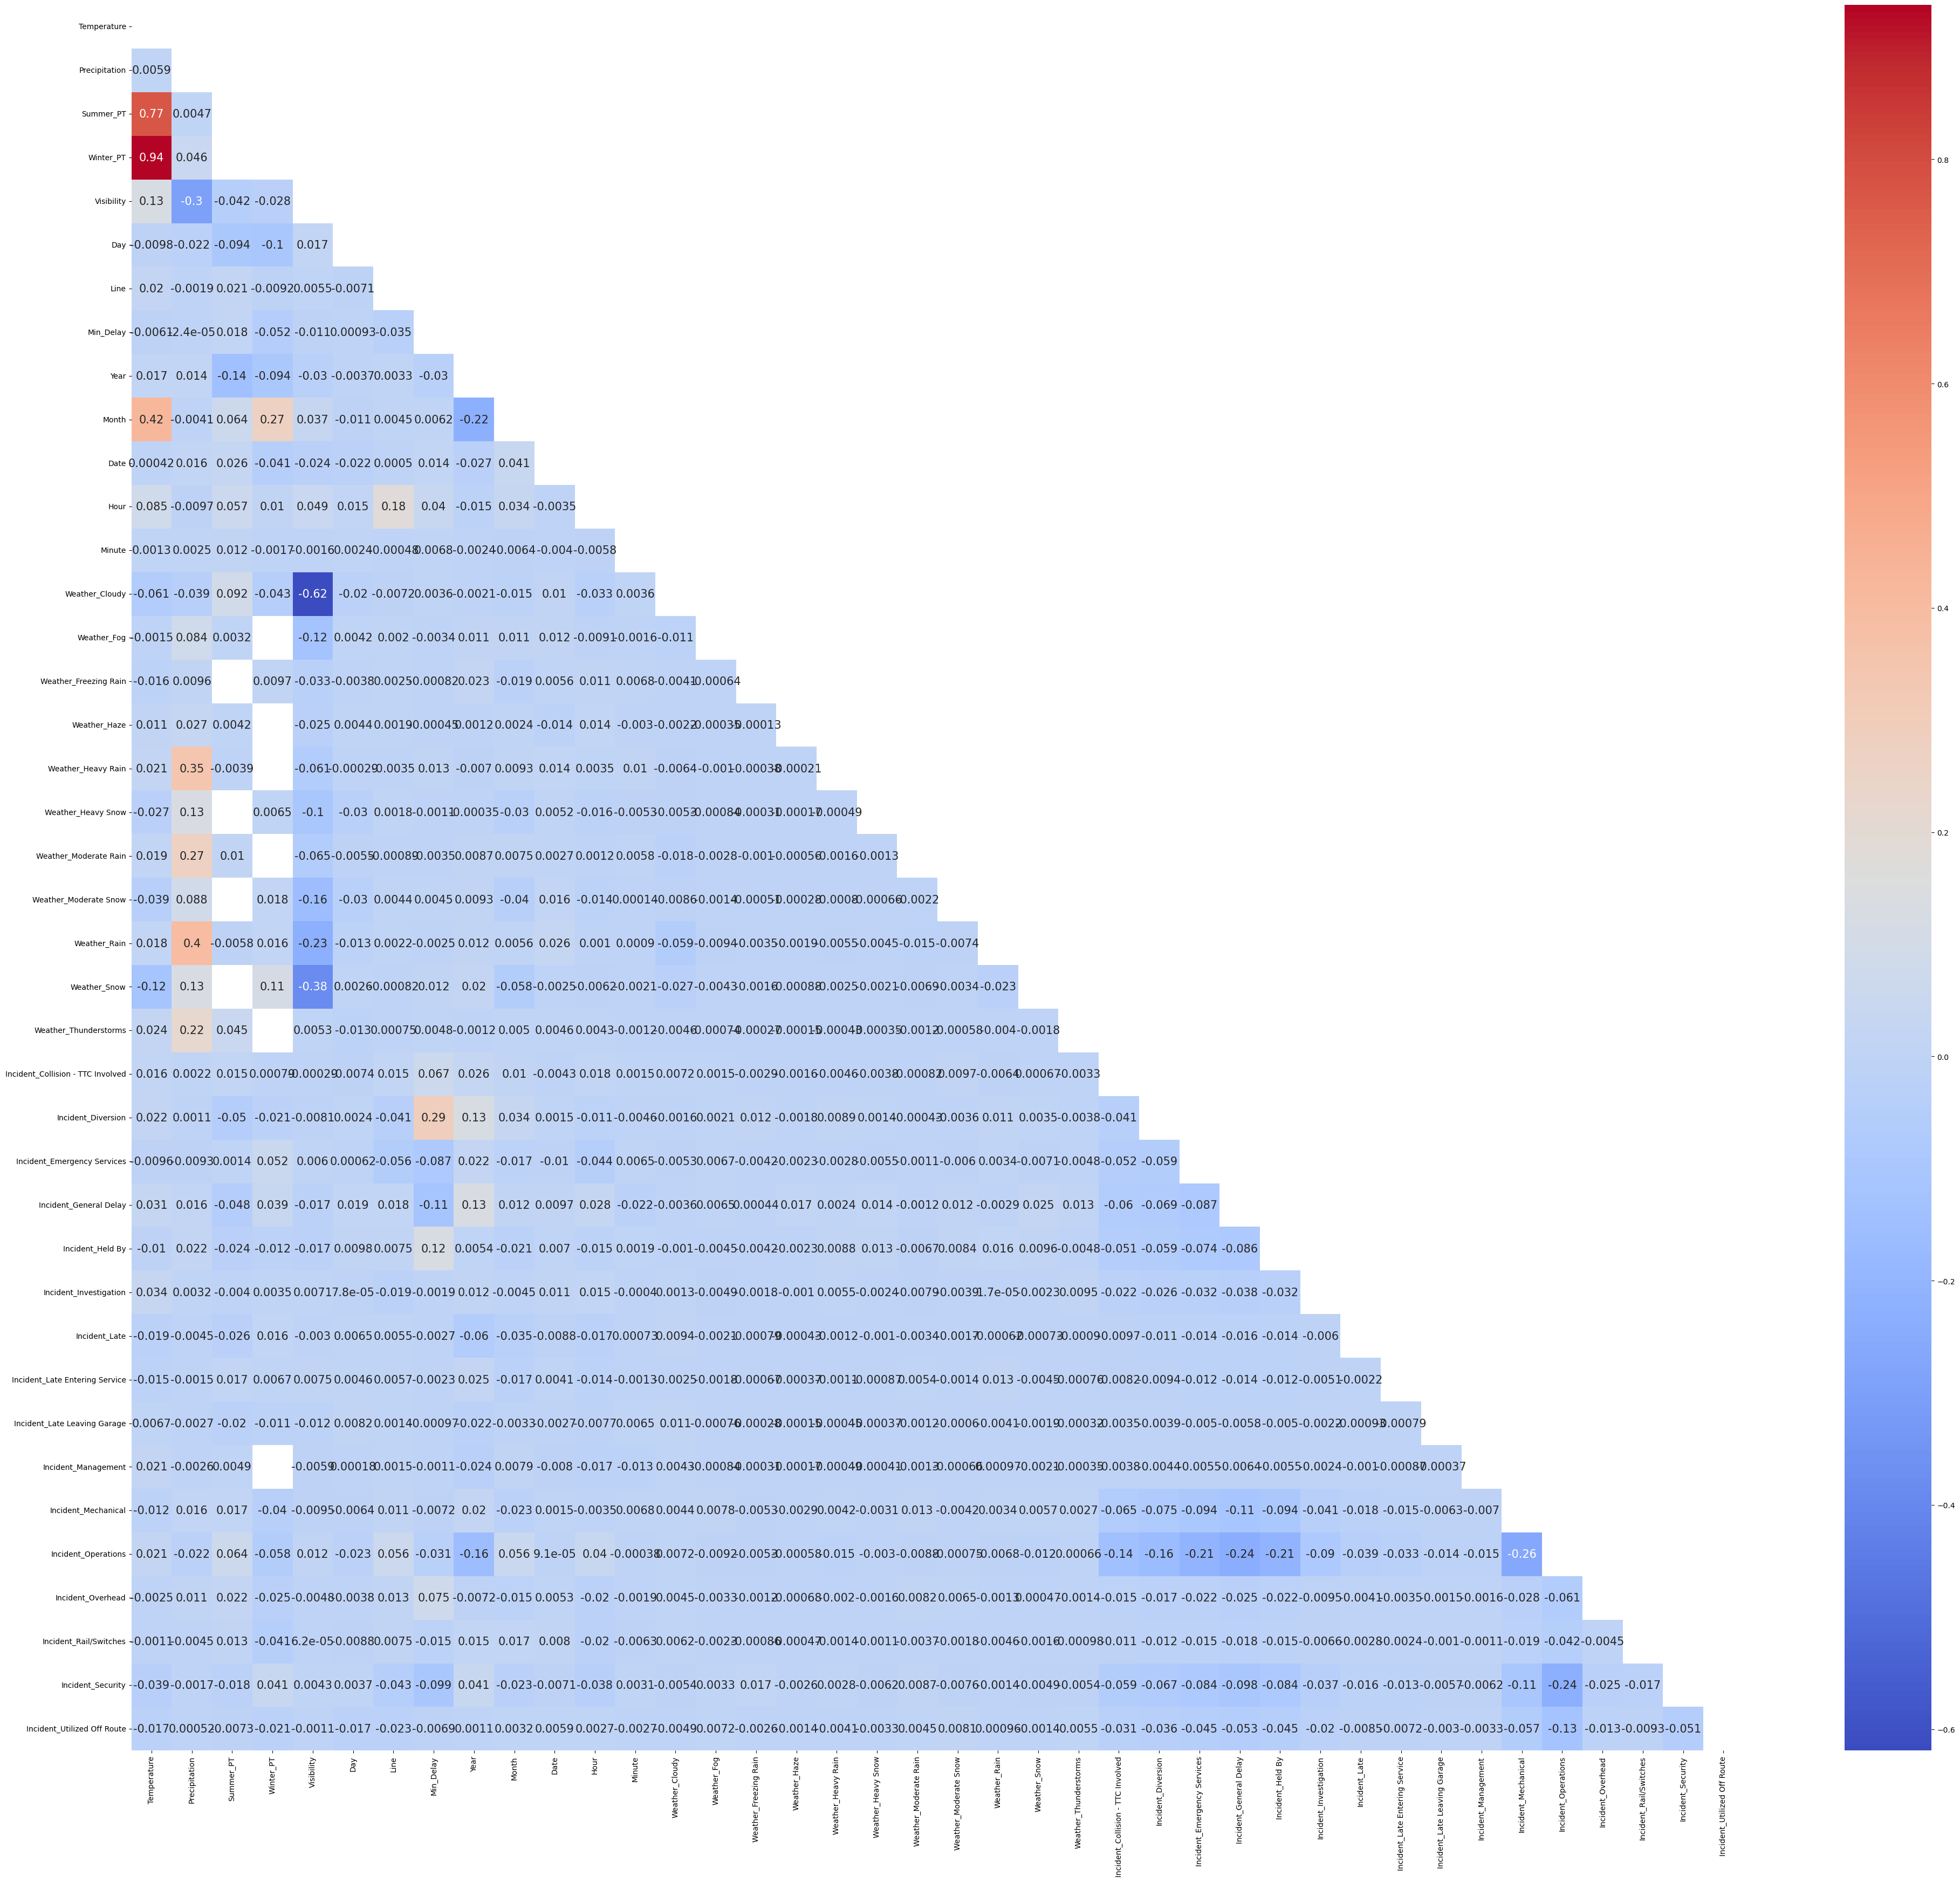

In [150]:
#Visualizing the correlations
plt.figure(figsize=(40,35))

matrix=np.triu(tw.corr())
sns.heatmap(tw.corr(), annot=True, mask=matrix, cmap='coolwarm', annot_kws={"size": 15})

plt.tight_layout()

Observation:
- Strong positive correlation between `Temperature` and `Summer/Winter_PT`. 
- Strong negative correlation between `Weather_Cloudy` and `Visibility`. 
- `Precipitation` has positive correlation between weather conditions. 
- Correlations have been identified between each streetcar and the weather dataset, but not between streetcars and weather as a whole.

-----
### 🚂 Summary

We now have a clean dataframe to use for modeling in the next notebook. All null values have been imputed, and categorical columns have been taken care of.

----
###  Data Saving

In [157]:
#saving the clean dataframe to use later!
df.to_csv('Capstone_clean_model.csv', index=False)